In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [ ]:
from rdkit import rdBase
rdBase.rdkitVersion

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

In [ ]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
my_molecule_list = []
for i in range(1, 16):
    my_molecule_list.append(('C#N', i))
for j in range(16, 30):
    my_molecule_list.append(("[H+]", j))
for k in range(30, 48):
    my_molecule_list.append(("[C-]#N", k))
print(my_molecule_list)


def mylistmolecule(d):
  newlist = []
  for a in d:
    mk = Chem.AddHs(Chem.MolFromSmiles(a[0]))
    for atom in mk.GetAtoms():
      atom.SetAtomMapNum(a[1])
    newlist.append(mk)
  return newlist

      #return Chem.MolToSmiles(mk)
d = my_molecule_list
flask = mylistmolecule(d)

def transformer(flask):
  molar = []
  for mol in flask:
    molar.append(Chem.MolToSmiles(mol))
  return molar

#transformer(flask)

molecul_list = transformer(flask)


In [ ]:
print(flask)

In [ ]:
print(transformer(flask))

In [ ]:
#reactiongenerator

def fixAtomNumRea1to2(educt, patt0, product1, patt1, product2, patt2):
  #dissoziation
  # SMARTS for subgraph matching
  e0_patt = Chem.MolFromSmarts(patt0)
  p1_patt = Chem.MolFromSmarts(patt1)
  p2_patt = Chem.MolFromSmarts(patt2)

  # construct embeding of educt SMART into educt
  e0_matches = educt.GetSubstructMatches(e0_patt)
  xxxx = [x.GetAtomMapNum() for x in e0_patt.GetAtoms()]
  yyyy = [x.GetAtomMapNum() for x in educt.GetAtoms()]
  eaids = dict(zip(xxxx, yyyy))
  # print('educt(s):')
  # print(eaids)

  # check if prodicts match to patterns
  #if not product1.GetSubstructMatches(p1_patt):
    # product1, product2 = product2, product1

  # set the correct atom mapping
  product1 = setAtomNums(product1, p1_patt, eaids)
  product2 = setAtomNums(product2, p2_patt, eaids)

  return product1, product2;



def fixAtomNumRea2to1(educt0, patt0, educt1, patt1, product, patt2):
  #assoziation
  e0_patt_ass = Chem.MolFromSmarts(patt0)
  e1_patt_ass = Chem.MolFromSmarts(patt1)
  p_patt_ass = Chem.MolFromSmarts(patt2)


  eaids_ass = getatommapnum_dim(e0_patt_ass, educt0)
  eaids_ass1 = getatommapnum_dim(e1_patt_ass, educt1)

  eaids_ass.update(eaids_ass1)


  product_dim = setAtomNums(product, p_patt_ass, eaids_ass)

  return product_dim

def setAtomNums(mol, pattern, embedding):
    matches = mol.GetSubstructMatches(pattern)
    aids = [ x.GetAtomMapNum() for x in pattern.GetAtoms()]
    aidss = list(zip(matches[0], aids))
    # print(aidss)

    # iterate over the atoms in the product molecule 
    for (x,y) in aidss:
        # print(x,';',y)
        a = mol.GetAtomWithIdx(x)
        # set AtomMapNum from educt as AtomMatchNum for product    
        a.SetAtomMapNum(embedding[y])

    return mol



def molfromsmarts_dim(patt0, educt0, patt1, educt1, patt2, educt2, patt3, product):
  #dimerization
  e0_patt_dim = Chem.MolFromSmarts(patt0)
  e1_patt_dim = Chem.MolFromSmarts(patt1)
  e2_patt_dim = Chem.MolFromSmarts(patt2)
  p1_patt_dim = Chem.MolFromSmarts(patt3)



  as_eaids_dim = getatommapnum_dim(e0_patt_dim, educt0)
  as_eaids_dim1 = getatommapnum_dim(e1_patt_dim, educt1)
  as_eaids_dim2 = getatommapnum_dim(e2_patt_dim, educt2)

  as_eaids_dim1.update(as_eaids_dim2)
  as_eaids_dim1.update(as_eaids_dim)
  as_eaids_dim1

  product_dim = setAtomNums(product, p1_patt_dim, as_eaids_dim1)

  #matches = mol.GetSubstructMatches(pattern)


  return product_dim

def getatommapnum_dim(patt_dim, educt):
  xxxx = [x.GetAtomMapNum() for x in patt_dim.GetAtoms()]
  yyyy = [x.GetAtomMapNum() for x in educt.GetAtoms()]
  eaids_ass = dict(zip(xxxx, yyyy))

  return eaids_ass

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import re
import itertools
# dis = AllChem.ReactionFromSmarts('[H:1][C:2]#[N:3]>>[H+:1].[C-:2]#[N:3]')
# ass = AllChem.ReactionFromSmarts('[H+:1].[C-:2]#[N:3]>>[H:1][C:2]#[N:3]') 
# dim =AllChem.ReactionFromSmarts('[H:1][C:2]#[N:3].[H+:4].[C-:5]#[N:6]>>[H:4][C:5](=[N:6][H:1])[C:2]#[N:3]') #product = p_dim[0][0] 

t = [0]
k_diss = 1
k_ass = 1
k_dim = 1
tend = 3000


full_list = []
all_cycles = []
k = 2
gamma = 0.1
all_products = []
amount_hcn = []
amount_hydrons = []
amount_cn = []
amount_imino = []
cnh_moleculet = []
imino_all_molecules = []
imino_m = []
iminoflask = []
hydronflask = []
cnflask = []
hcnflask = []
all_transformer_flasks = []
cycle = 0
while t[-1] < tend:
  print("\n")
  cycle += 1
  print(f"cycle: {cycle}")
  print(f"transformer(flask): {transformer(flask)}")
  all_transformer_flasks.append(cycle)
  all_transformer_flasks.append(transformer(flask))
  


  test_pattern_hcn = ('^\[H\+:[0-9.]*[0-9]+\]\[C\-:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]$|^\[H:[0-9.]*[0-9]+\]\[C:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]$')
  #phrase =  'HCN'
  list_id_hcn = []                    #amount of cn-
  cnh_molecules =[]
  cartesian_dissoziation = [] 
  for i, cnh in enumerate(flask):
    a =Chem.MolToSmiles(cnh)
    list_matches_hcn = re.findall(test_pattern_hcn, a)
    if len(list_matches_hcn) == 1:
      list_id_hcn.append(i)
      cnh_molecules.append(cnh)

      cartesian_dissoziation.append([i])

  print(f"list_id_hcn: {list_id_hcn}")
  print(len(list_id_hcn))
  amount_hcn.append(len(list_id_hcn))

  #print(f"is_last_id {amount_hcn[-1]}")
  if amount_hcn[-1] == 0:
        print("is zero")
        cnh_molecules = ['0']
  #print(f"cnh_molecules: {cnh_molecules}")
  #print(f"amount_hcn: {amount_hcn}")
  hcnflask.append(cnh_molecules)
  #ilt[amount_imino] = imino_molecules
  #amount_imino.append(i)
  #print(f"hcnflask: {hcnflask}")




  
  test_pattern_cn = '^\[C\-:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]$'                                            #'\[C\-:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]'
  #phrase =  '[C-:30]#[N:30]'
  list_id_cn = []                    #amount of cn-
  cnion_molecules =[]
  for i, cn in enumerate(flask):
    b =Chem.MolToSmiles(cn)
    list_matches_cn = re.findall(test_pattern_cn, b)
    if len(list_matches_cn) == 1:
      list_id_cn.append(i)
      cnion_molecules.append(cn)
  print(f"list_id_cn: {list_id_cn}")
  print(len(list_id_cn))
  amount_cn.append(len(list_id_cn))
  #print(f"is_last_id {amount_cn[-1]}")
  if amount_cn[-1] == 0:
        print("is zero")
        cnion_molecules = ['0']
  #print(f"cnion_molecules: {cnion_molecules}")
  #print(f"amount_cn: {amount_cn}")
  cnflask.append(cnion_molecules)
  #ilt[amount_imino] = imino_molecules
  #amount_imino.append(i)
  #print(f"cnflask: {cnflask}")



  hydron_molecules = []
  test_pattern_h = '^[H+:[0-9.]*[0-9]+]$'                                            #'\[H
  #phrase =    #'\[H
  list_id_h = []                    #amount of cn-
  for i, h in enumerate(flask):
    c =Chem.MolToSmiles(h)
    list_matches_h = re.findall(test_pattern_h, c)
    if len(list_matches_h) == 1:
      list_id_h.append(i)
      hydron_molecules.append(h)
  amount_hydrons.append(len(list_id_h))
  print(f"list_id_h: {list_id_h}")
  #print(f"is_last_id {amount_hydrons[-1]}")
  if amount_hydrons[-1] == 0:
        print("is zero")
        hydron_molecules = ['0']
  #print(f"hydron_molecules: {hydron_molecules}")
  #print(f"amount_hydrons: {amount_hydrons}")
  hydronflask.append(hydron_molecules)
  #ilt[amount_imino] = imino_molecules
  #amount_imino.append(i)
  #print(f"hydronflask: {hydronflask}")




  #test_pattern_imino = '^\[H:[0-9.]*[0-9]+\]\[N:[0-9.]*[0-9]+\]=\[C-:[0-9.]*[0-9]+\]\(\[C:[0-9.]*[0-9]+\]#\[N:[0-9.]*[0-9]+\]\)\[H\+:[0-9.]*[0-9]+\]$'
  test_pattern_imino = ('^\[H:[0-9.]*[0-9]+\]\[N:[0-9.]*[0-9]+\]=\[C-:[0-9.]*[0-9]+\]\(\[C:[0-9.]*[0-9]+\]#\[N:[0-9.]*[0-9]+\]\)\[H\+:[0-9.]*[0-9]+\]$|^\[H\+:[0-9.]*[0-9]+\]\[C-:[0-9.]*[0-9]+\]..C:[0-9.]*[0-9]+.#\[N:[0-9.]*[0-9]\].=\[N:[0-9.]*[0-9]+\][H:[0-9.]*[0-9]+\]$') 

  #phrase =    #'\[H
  list_id_imino = [] 
  k = []
  imino_molecules =[]
  
  imd = {}
  for i, imino in enumerate(flask):
    d =Chem.MolToSmiles(imino)
    list_matches_imino = re.findall(test_pattern_imino, d)
    if len(list_matches_imino) == 1:
      list_id_imino.append(i)
      imino_m.append(imino) 
      imino_molecules.append(imino)
      imd[i] = imino
  print(f"list_id_imino: {list_id_imino}")
  print(len(list_id_imino))
  amount_imino.append(len(list_id_imino))
  print(f"amount_imino {amount_imino}")
  #print(f"is_last_id {amount_imino[-1]}")
  if amount_imino[-1] == 0:
        print("is zero")
        imino_molecules = ['0']
  #print(f"imino_molecules: {imino_molecules}")
  #print(f"amount_imino: {amount_imino}")
  iminoflask.append(imino_molecules)
  #ilt[amount_imino] = imino_molecules
  #amount_imino.append(i)
  #print(f"iminoflask: {iminoflask}")



  #cartesian assoziation
  somelists = [
  list_id_h,
  list_id_cn,
  ]
  cartesian_assoziation = []
  sum_h_cn = []
  for element in itertools.product(*somelists):
    cartesian_assoziation.append(element)
  ###################
  possibilities_assoziation = len(cartesian_assoziation)



  #cartesian dimerization
  somelists2 = [
  list_id_hcn, 
  list_id_cn,
  list_id_h           
  ]
  cartesian_dimerization= []
  for element in itertools.product(*somelists2):
    cartesian_dimerization.append(element)
  
  possibilities_dimerization = len(cartesian_dimerization)
  possibilities_dissoziation = len(list_id_hcn)



  possibilities = possibilities_dissoziation + possibilities_assoziation + possibilities_dimerization
  cartesian = cartesian_dissoziation + cartesian_assoziation + cartesian_dimerization
  print(f"cartesian: {cartesian}")




  weight_diss = []
  for i in range(possibilities_dissoziation):
    weight_diss.append(k_diss)

  weight_ass = []
  for i in range(possibilities_assoziation):
    weight_ass.append(k_ass)

  weight_dim = []
  for i in range(possibilities_dimerization):
    weight_dim.append(k_dim)
  weights_rea = [*weight_diss, *weight_ass,  *weight_dim]
  #print("len_weights: rea")
  #print(len(weights_rea))
  if len(weights_rea) <= 1:
    print("break  off")                 #random
    break
  print(weights_rea)
  #print("cartesian: run")
    

  r = random.choices(population=cartesian, weights=weights_rea, k=1)
  rea_rule = list(itertools.chain(*r)) 
  #print("##########################new cycle")
  print(f"choosen cartesian of this reaction: {rea_rule}")
  print(f"length of rea_rule: {len(rea_rule)}")


  rates = [k_diss * possibilities_dissoziation, k_ass * possibilities_assoziation, k_dim * possibilities_dimerization]
  print(rates)
  rate_sum = sum(rates)
  print(rate_sum)
  tau = np.random.exponential(scale=1/rate_sum)
  t.append(t[-1] + tau)





  if len(rea_rule) == 1:
    print("rea_rule == 1 - dissoziation")


    dis = AllChem.ReactionFromSmarts('[H:1][C:2]#[N:3]>>[H+:1].[C-:2]#[N:3]')
    ps = dis.RunReactants([flask[rea_rule[0]]])
    p1, p2 = fixAtomNumRea1to2(flask[rea_rule[0]], '[H:1][C:2]#[N:3]', ps[0][0], '[H+:1]', ps[0][1], '[C-:2]#[N:3]')
    flask.append(p1)
    flask.append(p2)
    all_cycles.append(flask[rea_rule[0]])


    print(f"rea_rule:  {rea_rule[0]}")
    del flask[rea_rule[0]]
    
  
    full_list.append(p1)
    full_list.append(p2)
    
    
    all_cycles.append(p1)
    all_cycles.append(p2)




  if len(rea_rule) == 2:
    print("rea_rule == 2 - assoziation")
    #print(rea_rule[0])


    patt0 = '[H:1]'    
    patt1 = '[C:2]#[N:3]'
    patt2 = '[H:1][C:2]#[N:3]'
    educt0 = flask[rea_rule[0]]
    educt1 = flask[rea_rule[1]]
    ass = AllChem.ReactionFromSmarts('[H:1].[C:2]#[N:3]>>[H:1][C:2]#[N:3]') 
    rea_ass = ass.RunReactants([flask[rea_rule[0]], flask[rea_rule[1]]])
    product = rea_ass[0][0]
    product_ass = fixAtomNumRea2to1(educt0, patt0, educt1, patt1, product, patt2)
    all_cycles.append(flask[rea_rule[0]])
    all_cycles.append(flask[rea_rule[1]])
    flask = [v for i,v in enumerate(flask) if i not in frozenset((rea_rule[0], rea_rule[1]))]
    flask.append(product_ass) 
    full_list.append(product_ass)
    

    all_cycles.append(product_ass)
    
    
    
    

  if len(rea_rule) == 3:
    print("rea_rule == 3 - dimerization")
    patt0 = '[H:1][C:2]#[N:3]'
    patt1 = '[H:4]'
    patt2 = '[C:5]#[N:6]'
    patt3 = '[H:4][C:5](=[N:6][H:1])[C:2]#[N:3]'
    educt0 = flask[rea_rule[0]] 
    educt1 = flask[rea_rule[2]] 
    educt2 = flask[rea_rule[1]]
    dim =AllChem.ReactionFromSmarts('[H:1][C:2]#[N:3].[H:4].[C:5]#[N:6]>>[H:4][C:5](=[N:6][H:1])[C:2]#[N:3]')
    p_dim = dim.RunReactants([flask[rea_rule[0]], flask[rea_rule[2]], flask[rea_rule[1]]])
    product = p_dim[0][0]
    all_cycles.append(flask[rea_rule[0]])
    all_cycles.append(flask[rea_rule[2]])
    all_cycles.append(flask[rea_rule[1]])
    flask = [v for i,v in enumerate(flask) if i not in frozenset((rea_rule[0], rea_rule[2], rea_rule[1]))]
    product_dim = molfromsmarts_dim(patt0, educt0, patt1, educt1, patt2, educt2, patt3, product)
    flask.append(product_dim)
    full_list.append(product_dim)
    
    all_cycles.append(product_dim)
    
    

print(t)

print(f"all_transformer_flasks: {all_transformer_flasks}")

In [ ]:
amount_cn
amount_hydrons
amount_imino
amount_hcn

In [ ]:
print(t)

In [ ]:
print(len(t))

In [ ]:
print(full_list)

In [ ]:
print(all_cycles)

In [267]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [466]:
# Using iteration to assign values
def forsmart(input_list):
    tosmiles = []
    for x in range(len(input_list)): 
        temp = [] 
        for elem in input_list[x]:
            #print(elem)
            if elem != '0':
                k = Chem.MolToSmiles(elem)
            if elem == '0':
                k = elem
            #print(elem)
            temp.append(k) 
        tosmiles.append(temp) 
    return tosmiles



iminosmart = forsmart(iminoflask)
hsmart = forsmart(hydronflask)
cnsmart = forsmart(cnflask)
hcnsmart = forsmart(hcnflask)
#print(hydronflask)
#print(cnsmart)
#print(iminosmart)
print(len(iminosmart))

21


In [467]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t,
    y=amount_imino,
    hovertext=iminosmart,
    hoverinfo="text",
    showlegend=False,
    name='iminoacetonitrile'
))


fig.add_trace(go.Scatter(
    x=t,
    y=amount_hcn,
    hovertext=hcnsmart,
    hoverinfo="text",
    showlegend=False,
    name="C#N"
))



fig.add_trace(go.Scatter(
    x=t,
    y=amount_cn,
    hovertext=cnsmart,
    hoverinfo="text",
    showlegend=False,
    name='[C-]N'
))


fig.add_trace(go.Scatter(
    x=t,
    y=amount_hydrons,
    hovertext=hsmart,
    hoverinfo="text",
    showlegend=False,
    name='[H+]'
))


fig.update_layout(
    width=1800,
    height=1000,
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue",
)




fig.show()

In [468]:
print(cnsmart)

[['[C-:30]#[N:30]', '[C-:31]#[N:31]', '[C-:32]#[N:32]', '[C-:33]#[N:33]', '[C-:34]#[N:34]', '[C-:35]#[N:35]', '[C-:36]#[N:36]', '[C-:37]#[N:37]', '[C-:38]#[N:38]', '[C-:39]#[N:39]', '[C-:40]#[N:40]', '[C-:41]#[N:41]', '[C-:42]#[N:42]', '[C-:43]#[N:43]', '[C-:44]#[N:44]', '[C-:45]#[N:45]', '[C-:46]#[N:46]', '[C-:47]#[N:47]'], ['[C-:30]#[N:30]', '[C-:31]#[N:31]', '[C-:32]#[N:32]', '[C-:33]#[N:33]', '[C-:34]#[N:34]', '[C-:35]#[N:35]', '[C-:36]#[N:36]', '[C-:37]#[N:37]', '[C-:38]#[N:38]', '[C-:39]#[N:39]', '[C-:40]#[N:40]', '[C-:41]#[N:41]', '[C-:42]#[N:42]', '[C-:43]#[N:43]', '[C-:44]#[N:44]', '[C-:46]#[N:46]', '[C-:47]#[N:47]'], ['[C-:30]#[N:30]', '[C-:31]#[N:31]', '[C-:32]#[N:32]', '[C-:34]#[N:34]', '[C-:35]#[N:35]', '[C-:36]#[N:36]', '[C-:37]#[N:37]', '[C-:38]#[N:38]', '[C-:39]#[N:39]', '[C-:40]#[N:40]', '[C-:41]#[N:41]', '[C-:42]#[N:42]', '[C-:43]#[N:43]', '[C-:44]#[N:44]', '[C-:46]#[N:46]', '[C-:47]#[N:47]'], ['[C-:30]#[N:30]', '[C-:31]#[N:31]', '[C-:32]#[N:32]', '[C-:34]#[N:34]', '[

In [469]:
print(iminosmart)

[['0'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]'], ['[H:7][N:45]=[C-:45]([C:7]#[N:7

In [316]:
print(len(t))

21


In [470]:
import itertools

def smartoutput(smartstring):
    output = []  
    for x in range(len(smartstring)): 
        temp = [] 
        for elem in smartstring[x]:
            c = re.findall('[0-9]+', elem)
            temp.append(c)
        #print(temp)
        output.append(temp)
    return output

        
def newsmartoutput(smartstring):
    
    output = smartoutput(smartstring)
    new_output_list = []
    for cn in output:
        list2d = cn
        merged = list(itertools.chain(*list2d))
        new_output_list.append(merged)
    return new_output_list
        
        
def newsmartoutputtoint(smartstring):
    new_output_list = newsmartoutput(smartstring)
    new_int_output_list = []
    for enc in new_output_list:
        enc = list(map(int, enc))
        new_int_output_list.append(enc)
    return new_int_output_list
    
    

new_int_output_list_h = newsmartoutputtoint(hsmart)

new_int_output_list_cn = newsmartoutputtoint(cnsmart)

new_int_output_list_hcn = newsmartoutputtoint(hcnsmart)

new_int_output_list_imino = newsmartoutputtoint(iminosmart)


# new_int_output_list_h = []
# for enh in new_output_list_h:
#     enh = list(map(int, enh))
#     new_int_output_list_h.append(enh)
# print(new_int_output_list_h)



In [471]:
print(new_int_output_list_imino)

[[0], [7, 45, 45, 7, 7, 28], [7, 45, 45, 7, 7, 28], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24, 4, 44, 44, 4, 4, 16], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24, 4, 44, 44, 4, 4, 16, 8, 37, 37, 8, 8, 18], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24, 4, 44, 44, 4, 4, 16, 8, 37, 37, 8, 8, 18, 1, 35, 35, 1, 1, 20], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24, 4, 44, 44, 4, 4, 16, 8, 37, 37, 8, 8, 18, 1, 35, 35, 1, 1, 20, 5, 40, 40, 5, 5, 26], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24, 4, 44, 44, 4, 4, 16, 8, 37, 37, 8, 8, 18, 1, 35, 35, 1, 1, 20, 5, 40, 40, 5, 5, 26, 12, 47, 47, 12, 12, 23], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, 2, 43, 43, 2, 2, 24, 4, 44, 44, 4, 4, 16, 8, 37, 37, 8, 8, 18, 1, 35, 35, 1, 1, 20, 5, 40, 40, 5, 5, 26, 12, 47, 47, 12, 12, 23, 3, 31, 31, 3, 3, 22], [7

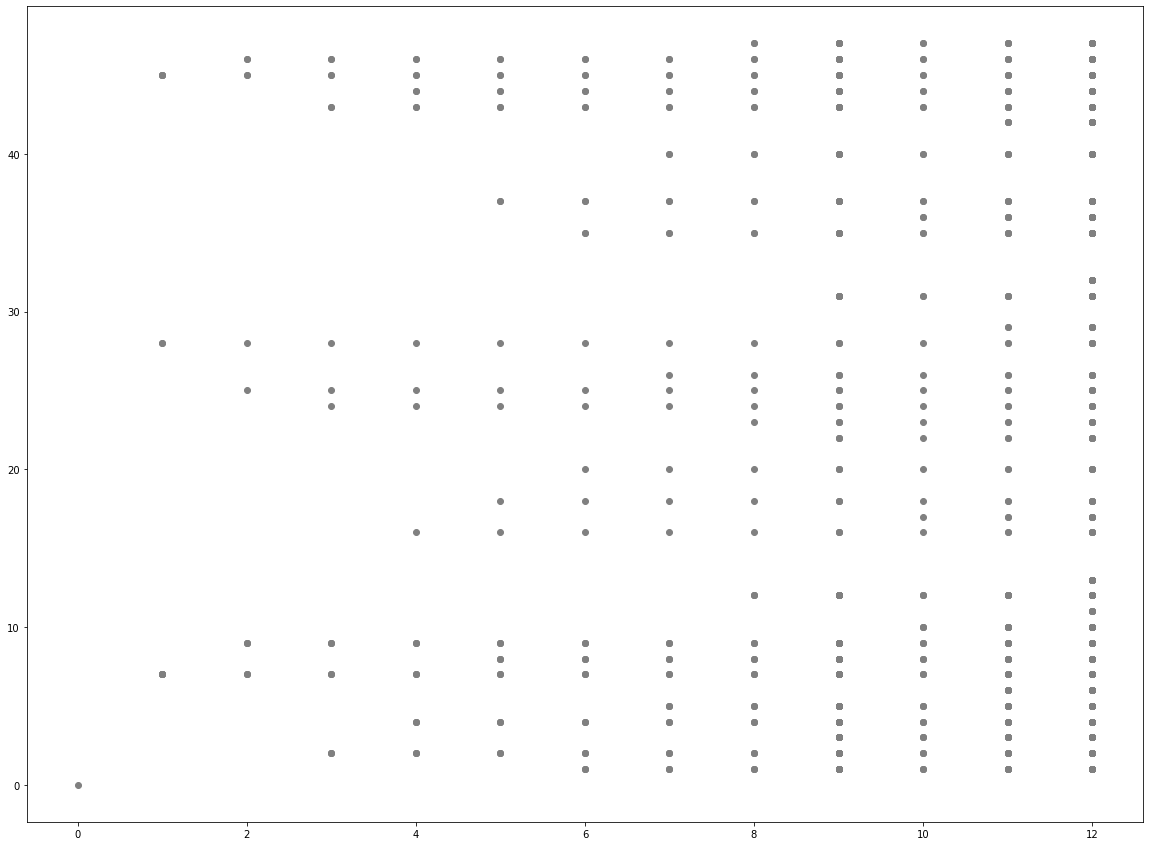

In [472]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(20,15))
x = amount_imino #[1, 2, 3, 4]
y = new_int_output_list_imino #[[0], [1, 11, 4], [1, 11, 4, 3, 9, 6], [1, 11, 4, 3, 9, 6, 2, 12, 8]]

for xi, yi in zip(x, y):
    plt.scatter(np.repeat(xi, len(yi)), yi, color = 'gray')

In [473]:
lennewiohcn = len(new_int_output_list_hcn)
lastlennewintol_hcn = len(new_int_output_list_hcn[0])


In [474]:
lst_hcn = [[-1]*lastlennewintol_hcn for _ in range(lennewiohcn)]


In [475]:
de_hcn = lst_hcn

for i, j in zip(new_int_output_list_hcn, de_hcn):
    for e, en in enumerate(i):
        j[e] = i[e]

        
print(de_hcn)

[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6,

In [476]:
lennewioh = len(new_int_output_list_h)
lastlennewintol_h = len(new_int_output_list_h[0])
lst_h = [[-1]*lastlennewintol_h for _ in range(lennewioh)]


In [477]:
de_h = lst_h

for i, j in zip(new_int_output_list_h, de_h):
    for e, en in enumerate(i):
        j[e] = i[e]

        
print(de_h)

[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, -1

In [478]:
lennewiocn = len(new_int_output_list_cn)
lastlennewintol_cn = len(new_int_output_list_cn[0])
lst_cn = [[-1]*lastlennewintol_cn for _ in range(lennewiocn)]

In [479]:
de_cn = lst_cn

for i, j in zip(new_int_output_list_cn, de_cn):
    for e, en in enumerate(i):
        j[e] = i[e]

        
print(de_cn)

[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1

In [480]:
lennewio = len(new_int_output_list_imino)
lastlennewintol = len(new_int_output_list_imino[-1])
lst = [[-1]*lastlennewintol for _ in range(lennewio)]


In [481]:
de = lst

for i, j in zip(new_int_output_list_imino, de):
    for e, en in enumerate(i):
        j[e] = i[e]

        
print(de)

[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

Text(0.5, 0, 'time')

Text(0, 0.5, 'atom numbers of molecules of cyanide')

Text(0.5, 1.0, 'Cyanide: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1')

0
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

1
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

2
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

3
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

4
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

5
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

6
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

7
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

8
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

9
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, 

10
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

11
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

12
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

13
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

14
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

15
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

16
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

17
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

18
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

19
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

20
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

21
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

22
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

23
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

24
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

25
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

26
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

27
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

28
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

29
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

30
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

31
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

32
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

33
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

34
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

35
[[30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47], [30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 46, 46, 47, 47, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 44, 44, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [30, 30, 31, 31, 32, 32, 34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 47, 47, -1, -1, -1, -1, -1, -1,

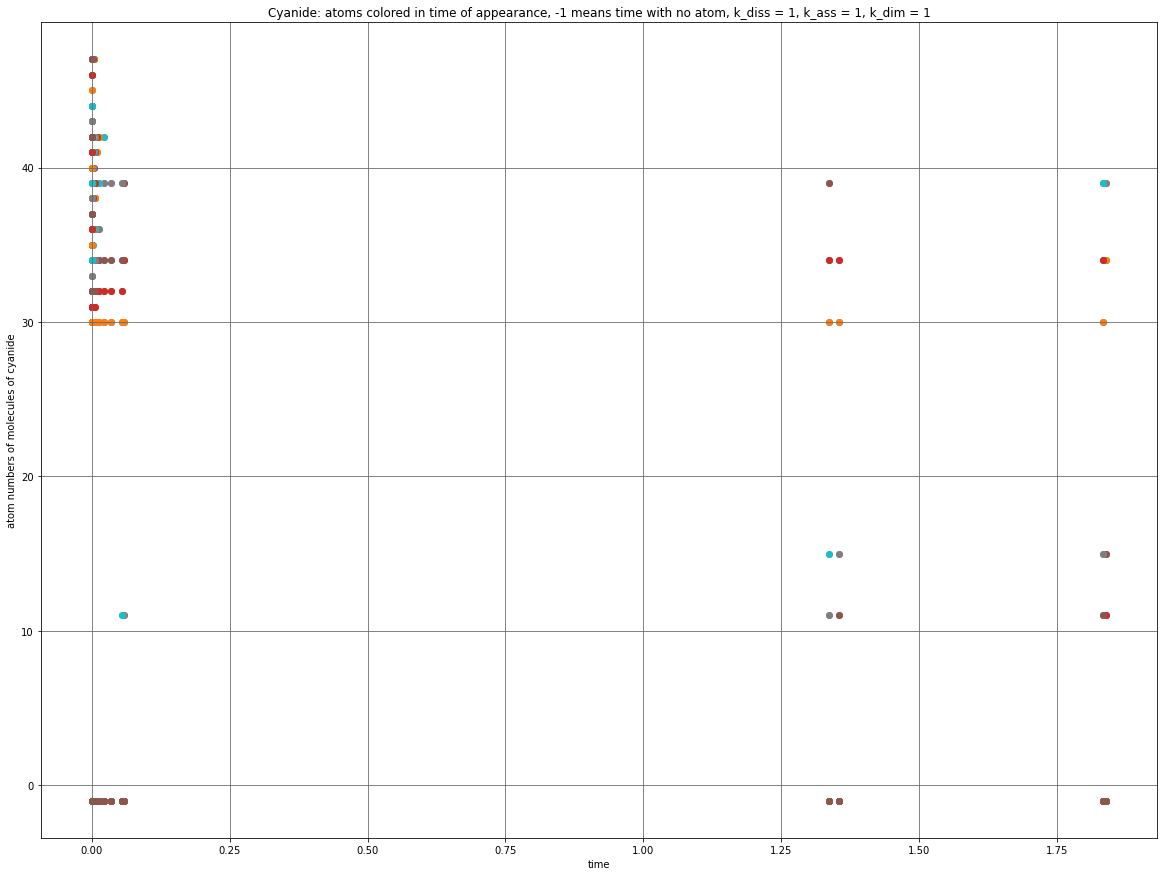

In [482]:
import matplotlib.pyplot as plt
#import pylab
fig= plt.figure(figsize=(20,15))
x = t#amount_cn #dart
y = de_cn
#[[], [1, 11, 4], []]
#[[[]], [['1', '11', '4']], [['1', '11', '4'], ['3', '9', '6']], [['1', '11', '4'], ['3', '9', '6'], ['2', '12', '8']]]
#[['X'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]', '[H:2][N:12]=[C-:12]([C:2]#[N:2])[H+:8]']]
#x = [0, 0.009524812458960715, 0.05205979681375577, 0.22047509015764818]

#y = [[0], [1, 11, 4], [1, 11, 4, 3, 9, 6], [1, 11, 4, 3, 9, 6, 2, 12, 8]]
plt.xlabel("time")
plt.ylabel("atom numbers of molecules of cyanide")
plt.title("Cyanide: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1")
for i in range(len(y[0])):
    print(i)
    print(y)
    print(y[0])
    plt.scatter(x,[pt[i] for pt in y])

# plt.xticks(x)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 1)
#plt.xscale('log')
plt.show()

Text(0.5, 0, 'time')

Text(0, 0.5, 'atom numbers of molecules of hydrogen cyanide')

Text(0.5, 1.0, 'Formonitrile: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1')

0
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

1
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

2
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

3
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

4
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

5
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

6
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

7
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

8
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

9
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 

10
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

11
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

12
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

13
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

14
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

15
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

16
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

17
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

18
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

19
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

20
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

21
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

22
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

23
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

24
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

25
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

26
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

27
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

28
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

29
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

30
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

31
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

32
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

33
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

34
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

35
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

36
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

37
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

38
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

39
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

40
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

41
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

42
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

43
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

44
[[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, -1, -1, -1], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1], [1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 19, 33, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 3, 3, 3, 5, 5, 5, 6, 6,

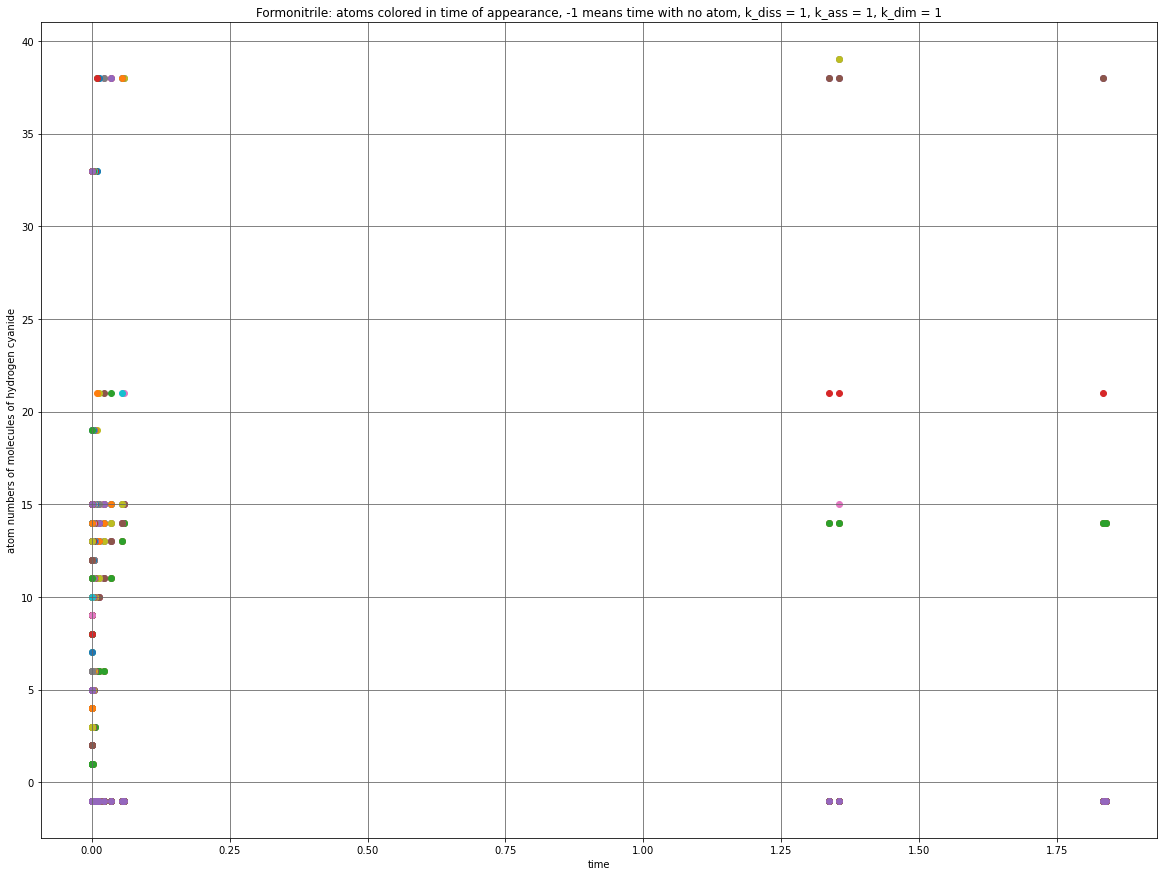

In [484]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,15))
x = t #dart
y = de_hcn
#[[], [1, 11, 4], []]
#[[[]], [['1', '11', '4']], [['1', '11', '4'], ['3', '9', '6']], [['1', '11', '4'], ['3', '9', '6'], ['2', '12', '8']]]
#[['X'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]', '[H:2][N:12]=[C-:12]([C:2]#[N:2])[H+:8]']]
#x = [0, 0.009524812458960715, 0.05205979681375577, 0.22047509015764818]

#y = [[0], [1, 11, 4], [1, 11, 4, 3, 9, 6], [1, 11, 4, 3, 9, 6, 2, 12, 8]]
plt.xlabel("time")
plt.ylabel("atom numbers of molecules of hydrogen cyanide")
plt.title("Formonitrile: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1")
for i in range(len(y[0])):
    print(i)
    print(y)
    print(y[0])
    plt.scatter(x,[pt[i] for pt in y])

# plt.xticks(x)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 1)

plt.show()

Text(0.5, 0, 'time')

Text(0, 0.5, 'atom numbers of molecules of atoms of hydron')

Text(0.5, 1.0, 'Hydrons: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1')

0
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

1
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

2
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

3
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

4
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

5
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

6
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

7
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

8
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

9
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1, 

10
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1,

11
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1,

12
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1,

13
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1], [16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, -1, -1], [16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, -1, -1, -1], [16, 17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1], [17, 18, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1], [17, 20, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 26, 27, 29, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 23, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 22, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 21, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 27, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [17, 29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [29, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [15, -1, -1,

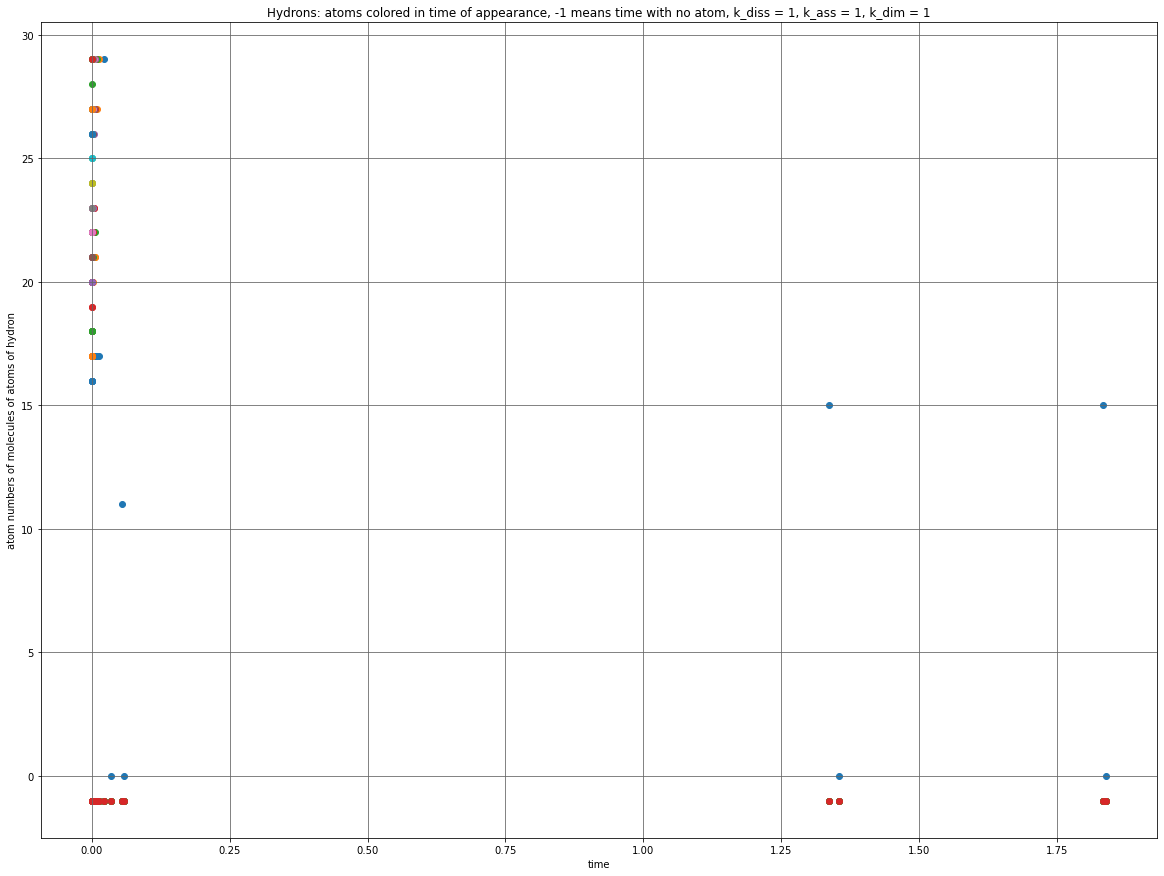

In [485]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
x = t#amount_hydrons #dart   molecule numbers of atoms of hydrogen cyanide
y = de_h
#[[], [1, 11, 4], []]
#[[[]], [['1', '11', '4']], [['1', '11', '4'], ['3', '9', '6']], [['1', '11', '4'], ['3', '9', '6'], ['2', '12', '8']]]
#[['X'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]', '[H:2][N:12]=[C-:12]([C:2]#[N:2])[H+:8]']]
#x = [0, 0.009524812458960715, 0.05205979681375577, 0.22047509015764818]

#y = [[0], [1, 11, 4], [1, 11, 4, 3, 9, 6], [1, 11, 4, 3, 9, 6, 2, 12, 8]]
plt.xlabel("time")
plt.ylabel("atom numbers of molecules of atoms of hydron")
plt.title("Hydrons: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1")
for i in range(len(y[0])):
    print(i)
    print(y)
    print(y[0])
    plt.scatter(x,[pt[i] for pt in y])

# plt.xticks(x)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 1)

plt.show()

In [486]:
t_rounded = []
for te in t:
    tround = round(te, 4)
    t_rounded.append(tround)

print(t_rounded)

[0, 0.0, 0.0003, 0.0004, 0.0006, 0.0007, 0.0023, 0.0039, 0.0047, 0.0061, 0.0068, 0.0088, 0.014, 0.022, 0.0355, 0.0555, 0.0585, 1.337, 1.3551, 1.8328, 1.8387]


Text(0.5, 0, 'time: [0, 0.0004, 0.0004, 0.0006, 0.0016, 0.0027, 0.0031, 0.0031, 0.0042, 0.0045, 0.0046, 0.008, 0.0167, 0.0229, 0.0427, 0.2309, 0.3134, 0.403, 0.4596]')

Text(0, 0.5, 'atom numbers of molecules of iminoacetonitrile')

Text(0.5, 1.0, 'Iminoacetonitrile: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1')

0
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

1
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

2
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

3
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

4
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

5
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

6
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

7
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

8
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

9
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

10
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

11
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

12
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

13
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

14
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

15
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

16
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

17
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

18
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

19
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

20
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

21
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

22
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

23
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

24
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

25
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

26
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

27
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

28
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

29
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

30
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

31
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

32
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

33
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

34
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

35
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

36
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

37
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

38
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

39
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

40
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

41
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

42
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

43
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

44
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

45
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

46
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

47
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

48
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

49
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

50
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

51
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

52
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

53
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

54
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

55
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

56
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

57
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

58
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

59
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

60
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

61
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

62
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

63
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

64
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

65
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

66
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

67
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

68
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

69
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

70
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

71
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

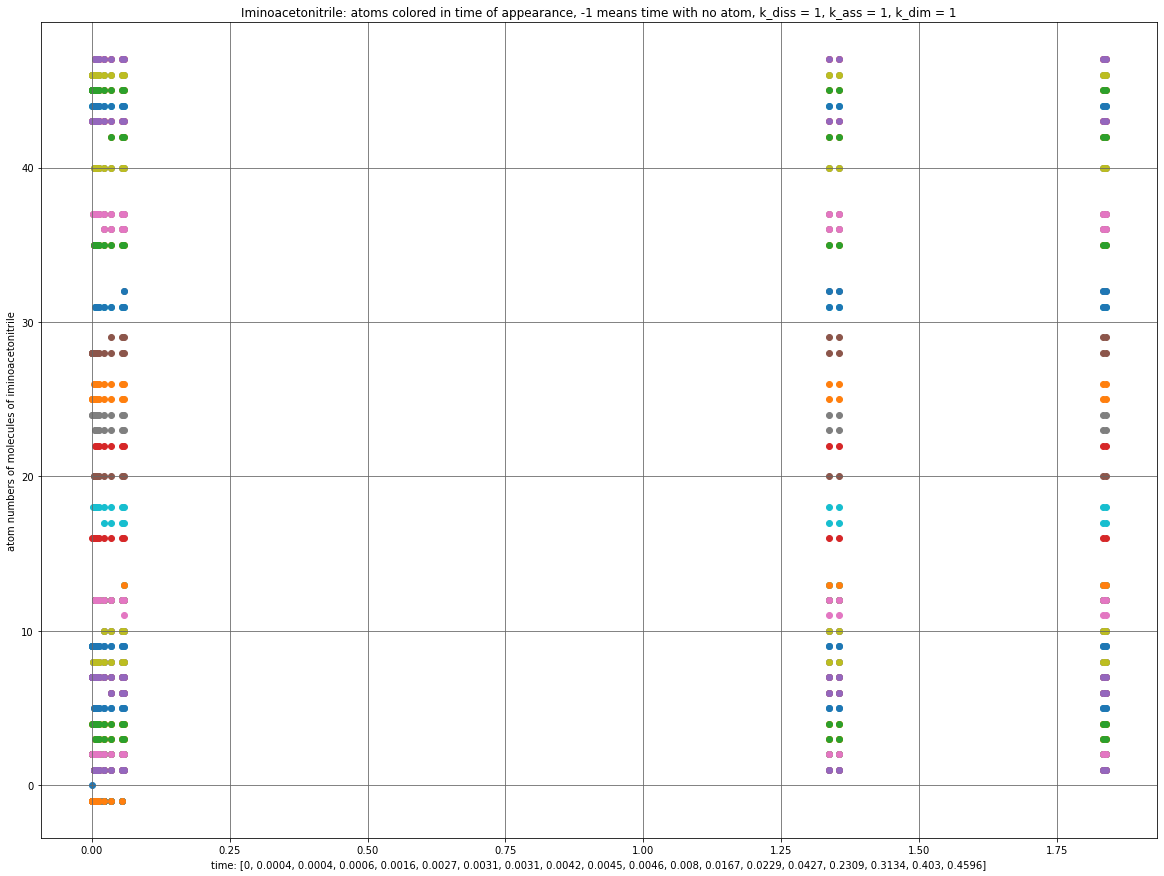

In [487]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
x = t#ta#amount_hydrons #dart   molecule numbers of atoms of hydrogen cyanide
y = de
#[[], [1, 11, 4], []]
#[[[]], [['1', '11', '4']], [['1', '11', '4'], ['3', '9', '6']], [['1', '11', '4'], ['3', '9', '6'], ['2', '12', '8']]]
#[['X'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]', '[H:2][N:12]=[C-:12]([C:2]#[N:2])[H+:8]']]
#x = [0, 0.009524812458960715, 0.05205979681375577, 0.22047509015764818]

#y = [[0], [1, 11, 4], [1, 11, 4, 3, 9, 6], [1, 11, 4, 3, 9, 6, 2, 12, 8]]
plt.xlabel("time: [0, 0.0004, 0.0004, 0.0006, 0.0016, 0.0027, 0.0031, 0.0031, 0.0042, 0.0045, 0.0046, 0.008, 0.0167, 0.0229, 0.0427, 0.2309, 0.3134, 0.403, 0.4596]")
plt.ylabel("atom numbers of molecules of iminoacetonitrile")
plt.title("Iminoacetonitrile: atoms colored in time of appearance, -1 means time with no atom, k_diss = 1, k_ass = 1, k_dim = 1")
for i in range(len(y[0])):
    print(i)
    print(y)
    print(y[0])
    plt.scatter(x,[pt[i] for pt in y])

# plt.xticks(x)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 1)

plt.show()

In [488]:
print(len(t))

21


In [489]:
print(amount_imino)

[0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 10, 11, 11, 12, 12, 12, 12, 12]


Text(0.5, 0, 'amount of iminoacetonitrile per cycle/can have more cycles: [0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13, 14]')

Text(0, 0.5, 'atom numbers of molecules of iminoacetonitrile')

Text(0.5, 1.0, 'atoms are colored in time of appearance of molecules, atoms on -1 are ne,  k_diss = 1, k_ass = 1, k_dim = 1')

0
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

1
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

2
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

3
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

4
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

5
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

6
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

7
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

8
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

9
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

10
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

11
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

12
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

13
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

14
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

15
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

16
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

17
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

18
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

19
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

20
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

21
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

22
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

23
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

24
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

25
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

26
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

27
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

28
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

29
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

30
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

31
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

32
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

33
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

34
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

35
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

36
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

37
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

38
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

39
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

40
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

41
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

42
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

43
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

44
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

45
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

46
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

47
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

48
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

49
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

50
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

51
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

52
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

53
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

54
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

55
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

56
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

57
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

58
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

59
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

60
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

61
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

62
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

63
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

64
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

65
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

66
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

67
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

68
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

69
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

70
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

71
[[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [7, 45, 45, 7, 7, 28, 9, 46, 46, 9, 9, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

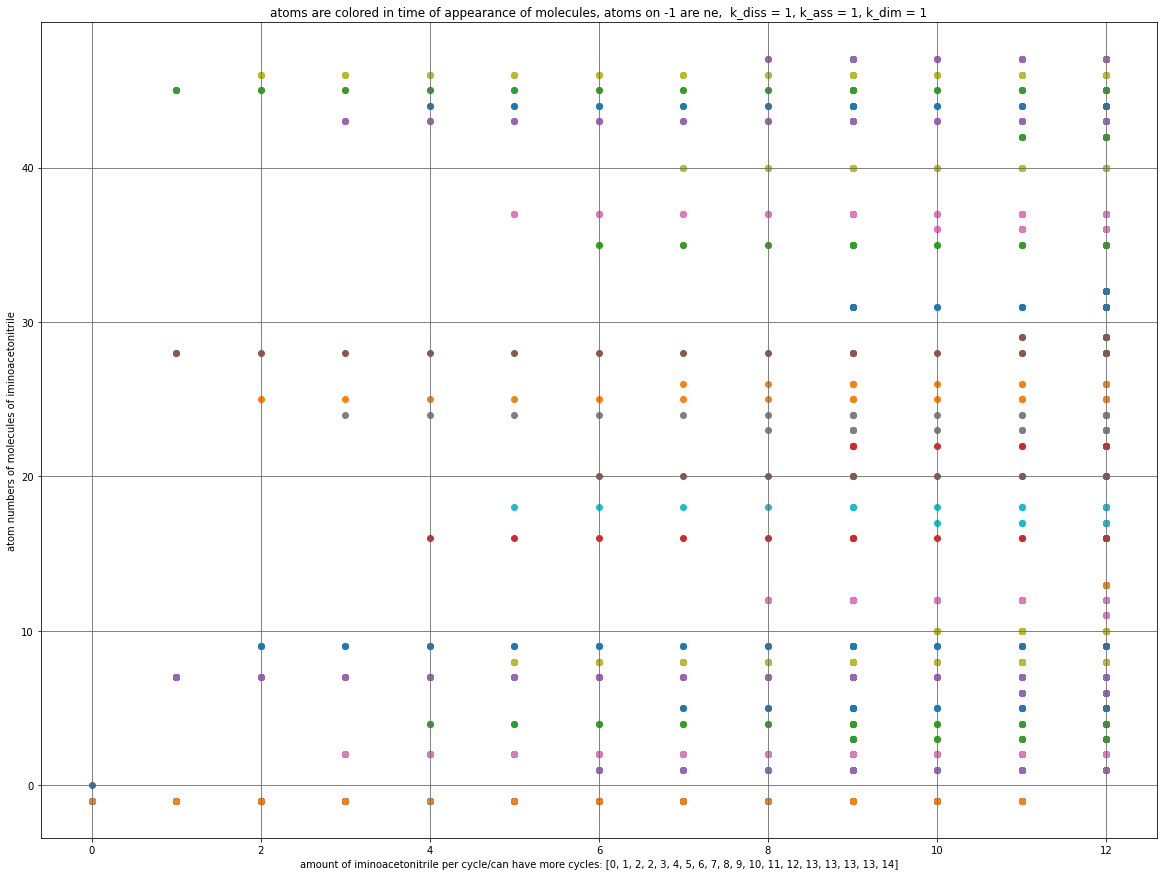

In [490]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,15))
x = amount_imino #dart
y = de
#[[], [1, 11, 4], []]
#[[[]], [['1', '11', '4']], [['1', '11', '4'], ['3', '9', '6']], [['1', '11', '4'], ['3', '9', '6'], ['2', '12', '8']]]
#[['X'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]'], ['[H:1][N:11]=[C-:11]([C:1]#[N:1])[H+:4]', '[H:3][N:9]=[C-:9]([C:3]#[N:3])[H+:6]', '[H:2][N:12]=[C-:12]([C:2]#[N:2])[H+:8]']]
#x = [0, 0.009524812458960715, 0.05205979681375577, 0.22047509015764818]

#y = [[0], [1, 11, 4], [1, 11, 4, 3, 9, 6], [1, 11, 4, 3, 9, 6, 2, 12, 8]]
plt.xlabel("amount of iminoacetonitrile per cycle/can have more cycles: [0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13, 14]")
plt.ylabel("atom numbers of molecules of iminoacetonitrile")
plt.title("atoms are colored in time of appearance of molecules, atoms on -1 are ne,  k_diss = 1, k_ass = 1, k_dim = 1")
for i in range(len(y[0])):
    print(i)
    print(y)
    print(y[0])
    plt.scatter(x,[pt[i] for pt in y])

# plt.xticks(x)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 1)

plt.show()

In [492]:
new_full_list = []
for f in full_list:
    k = Chem.MolToSmiles(f)
    new_full_list.append(k)
print(new_full_list)

['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19][C-:33]#[N:33]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21][C-:38]#[N:38]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H+:11]', '[C-:11]#[N:11]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']


In [494]:
new_all_cycles = []
for g in all_cycles:
    i = Chem.MolToSmiles(g)
    new_all_cycles.append(i)
print(new_all_cycles)

['[H:7][C:7]#[N:7]', '[H+:28]', '[C-:45]#[N:45]', '[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19]', '[C-:33]#[N:33]', '[H+:19][C-:33]#[N:33]', '[H:9][C:9]#[N:9]', '[H+:25]', '[C-:46]#[N:46]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][C:2]#[N:2]', '[H+:24]', '[C-:43]#[N:43]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][C:4]#[N:4]', '[H+:16]', '[C-:44]#[N:44]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][C:8]#[N:8]', '[H+:18]', '[C-:37]#[N:37]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][C:1]#[N:1]', '[H+:20]', '[C-:35]#[N:35]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][C:5]#[N:5]', '[H+:26]', '[C-:40]#[N:40]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][C:12]#[N:12]', '[H+:23]', '[C-:47]#[N:47]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][C:3]#[N:3]', '[H+:22]', '[C-:31]#[N:31]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21]', '[C-:38]#[N:38]', '[H+:21][C-:38]#[N:38]', '[H+:19][C-:33]#[N:33]', '[H+:27]', '[C-:41]#[N:41]', '[H

In [341]:
import itertools
import re
print(len(new_full_list))
test_pattern_h = '^[H+:[0-9.]*[0-9]+]$'
test_pattern_cn = '^\[C\-:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]$'  #'\[C\-:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]'  #phrase =    #'\[H
test_pattern_imino = ('^\[H:[0-9.]*[0-9]+\]\[N:[0-9.]*[0-9]+\]=\[C-:[0-9.]*[0-9]+\]\(\[C:[0-9.]*[0-9]+\]#\[N:[0-9.]*[0-9]+\]\)\[H\+:[0-9.]*[0-9]+\]$|^\[H\+:[0-9.]*[0-9]+\]\[C-:[0-9.]*[0-9]+\]..C:[0-9.]*[0-9]+.#\[N:[0-9.]*[0-9]\].=\[N:[0-9.]*[0-9]+\][H:[0-9.]*[0-9]+\]$') 

test_pattern_hcn = ('^\[H\+:[0-9.]*[0-9]+\]\[C\-:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]$|^\[H:[0-9.]*[0-9]+\]\[C:[0-9.]*[0-9]+\]\#\[N:[0-9.]*[0-9]+\]$')

an = ['[H:6][N:35]=[C-:35]([C:6]#[N:6])[H+:24]', '[H:5][N:45]=[C-:45]([C:5]#[N:5])[H+:23]', '[H+:2]', '[C-:2]#[N:2]', '[H:1][N:10]=[C-:10]([C:1]#[N:1])[H+:6]', '[H:7][N:47]=[C-:47]([C:7]#[N:7])[H+:27]']

23


In [170]:
an_new_all_cycles2 = ['[H:14][C:14]#[N:14]', '[H+:26]', '[C-:35]#[N:35]', '[H:14][N:35]=[C-:35]([C:14]#[N:14])[H+:26]', '[H:1][C:1]#[N:1]', '[H+:21]', '[C-:39]#[N:39]', '[H:1][N:39]=[C-:39]([C:1]#[N:1])[H+:21]', '[H+:28]', '[C-:47]#[N:47]', '[H+:28][C-:47]#[N:47]', '[H:9][C:9]#[N:9]', '[H+:27]', '[C-:40]#[N:40]', '[H:9][N:40]=[C-:40]([C:9]#[N:9])[H+:27]', '[H:11][C:11]#[N:11]', '[H+:29]', '[C-:45]#[N:45]', '[H:11][N:45]=[C-:45]([C:11]#[N:11])[H+:29]', '[H:2][C:2]#[N:2]', '[H+:22]', '[C-:33]#[N:33]', '[H:2][N:33]=[C-:33]([C:2]#[N:2])[H+:22]', '[H:8][C:8]#[N:8]', '[H+:24]', '[C-:38]#[N:38]', '[H:8][N:38]=[C-:38]([C:8]#[N:8])[H+:24]', '[H:5][C:5]#[N:5]', '[H+:23]', '[C-:43]#[N:43]', '[H:5][N:43]=[C-:43]([C:5]#[N:5])[H+:23]', '[H:4][C:4]#[N:4]', '[H+:25]', '[C-:46]#[N:46]', '[H:4][N:46]=[C-:46]([C:4]#[N:4])[H+:25]', '[H:12][C:12]#[N:12]', '[H+:17]', '[C-:37]#[N:37]', '[H:12][N:37]=[C-:37]([C:12]#[N:12])[H+:17]', '[H:13][C:13]#[N:13]', '[H+:19]', '[C-:34]#[N:34]', '[H:13][N:34]=[C-:34]([C:13]#[N:13])[H+:19]', '[H:15][C:15]#[N:15]', '[H+:18]', '[C-:31]#[N:31]', '[H:15][N:31]=[C-:31]([C:15]#[N:15])[H+:18]', '[H:10][C:10]#[N:10]', '[H+:16]', '[C-:41]#[N:41]', '[H:10][N:41]=[C-:41]([C:10]#[N:10])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:20]', '[C-:44]#[N:44]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:20]', '[H+:28][C-:47]#[N:47]', '[H+:28]', '[C-:47]#[N:47]', '[H+:28]', '[C-:32]#[N:32]', '[H+:28][C-:32]#[N:32]', '[H+:28][C-:32]#[N:32]', '[H+:28]', '[C-:32]#[N:32]', '[H:6][C:6]#[N:6]']

In [171]:
an_new_all_cycles1 = ['[H:14][N:35]=[C-:35]([C:14]#[N:14])[H+:26]', '[H:1][N:39]=[C-:39]([C:1]#[N:1])[H+:21]', '[H+:28][C-:47]#[N:47]', '[H:9][N:40]=[C-:40]([C:9]#[N:9])[H+:27]', '[H:11][N:45]=[C-:45]([C:11]#[N:11])[H+:29]', '[H:2][N:33]=[C-:33]([C:2]#[N:2])[H+:22]', '[H:8][N:38]=[C-:38]([C:8]#[N:8])[H+:24]', '[H:5][N:43]=[C-:43]([C:5]#[N:5])[H+:23]', '[H:4][N:46]=[C-:46]([C:4]#[N:4])[H+:25]', '[H:12][N:37]=[C-:37]([C:12]#[N:12])[H+:17]', '[H:13][N:34]=[C-:34]([C:13]#[N:13])[H+:19]', '[H:15][N:31]=[C-:31]([C:15]#[N:15])[H+:18]', '[H:10][N:41]=[C-:41]([C:10]#[N:10])[H+:16]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:20]', '[H+:28]', '[C-:47]#[N:47]', '[H+:28][C-:32]#[N:32]', '[H+:28]', '[C-:32]#[N:32]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:28]']

In [172]:
an_new_all_cycles = ['[H:5][C:5]#[N:5]', '[H+:26]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:26]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:38]#[N:38]', '[H:11][N:38]=[C-:38]([C:11]#[N:11])[H+:20]', '[H:2][C:2]#[N:2]', '[H+:19]', '[C-:36]#[N:36]', '[H:2][N:36]=[C-:36]([C:2]#[N:2])[H+:19]', '[H:10][C:10]#[N:10]', '[H+:23]', '[C-:46]#[N:46]', '[H:10][N:46]=[C-:46]([C:10]#[N:10])[H+:23]', '[H:12][C:12]#[N:12]', '[H+:28]', '[C-:42]#[N:42]', '[H:12][N:42]=[C-:42]([C:12]#[N:12])[H+:28]', '[H:3][C:3]#[N:3]', '[H+:18]', '[C-:45]#[N:45]', '[H:3][N:45]=[C-:45]([C:3]#[N:3])[H+:18]', '[H:4][C:4]#[N:4]', '[H+:29]', '[C-:39]#[N:39]', '[H:4][N:39]=[C-:39]([C:4]#[N:4])[H+:29]', '[H:14][C:14]#[N:14]', '[H+:27]', '[C-:47]#[N:47]', '[H:14][N:47]=[C-:47]([C:14]#[N:14])[H+:27]', '[H:6][C:6]#[N:6]', '[H+:17]', '[C-:35]#[N:35]', '[H:6][N:35]=[C-:35]([C:6]#[N:6])[H+:17]', '[H:13][C:13]#[N:13]', '[H+:24]', '[C-:37]#[N:37]', '[H:13][N:37]=[C-:37]([C:13]#[N:13])[H+:24]', '[H:9][C:9]#[N:9]', '[H+:16]', '[C-:33]#[N:33]', '[H:9][N:33]=[C-:33]([C:9]#[N:9])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:21]', '[C-:40]#[N:40]', '[H:7][N:40]=[C-:40]([C:7]#[N:7])[H+:21]', '[H:15][C:15]#[N:15]', '[H+:22]', '[C-:34]#[N:34]', '[H:15][N:34]=[C-:34]([C:15]#[N:15])[H+:22]', '[H:8][C:8]#[N:8]', '[H+:25]', '[C-:43]#[N:43]', '[H:8][N:43]=[C-:43]([C:8]#[N:8])[H+:25]']

In [173]:
an_new_all_cycles = ['[H:8][C:8]#[N:8]', '[H+:29]', '[C-:35]#[N:35]', '[H:8][N:35]=[C-:35]([C:8]#[N:8])[H+:29]', '[H:3][C:3]#[N:3]', '[H+:23]', '[C-:40]#[N:40]', '[H:3][N:40]=[C-:40]([C:3]#[N:3])[H+:23]', '[H:13][C:13]#[N:13]', '[H+:17]', '[C-:47]#[N:47]', '[H:13][N:47]=[C-:47]([C:13]#[N:13])[H+:17]', '[H:4][C:4]#[N:4]', '[H+:28]', '[C-:38]#[N:38]', '[H:4][N:38]=[C-:38]([C:4]#[N:4])[H+:28]', '[H:12][C:12]#[N:12]', '[H+:16]', '[C-:41]#[N:41]', '[H:12][N:41]=[C-:41]([C:12]#[N:12])[H+:16]', '[H:14][C:14]#[N:14]', '[H+:19]', '[C-:33]#[N:33]', '[H:14][N:33]=[C-:33]([C:14]#[N:14])[H+:19]', '[H:7][C:7]#[N:7]', '[H+:27]', '[C-:34]#[N:34]', '[H:7][N:34]=[C-:34]([C:7]#[N:7])[H+:27]', '[H:9][C:9]#[N:9]', '[H+:22]', '[C-:46]#[N:46]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:22]', '[H:15][C:15]#[N:15]', '[H+:21]', '[C-:45]#[N:45]', '[H:15][N:45]=[C-:45]([C:15]#[N:15])[H+:21]', '[H:11][C:11]#[N:11]', '[H+:26]', '[C-:31]#[N:31]', '[H:11][N:31]=[C-:31]([C:11]#[N:11])[H+:26]', '[H:5][C:5]#[N:5]', '[H+:25]', '[C-:44]#[N:44]', '[H:5][N:44]=[C-:44]([C:5]#[N:5])[H+:25]', '[H:10][C:10]#[N:10]', '[H+:24]', '[C-:43]#[N:43]', '[H:10][N:43]=[C-:43]([C:10]#[N:10])[H+:24]', '[H:6][C:6]#[N:6]', '[H+:20]', '[C-:39]#[N:39]', '[H:6][N:39]=[C-:39]([C:6]#[N:6])[H+:20]', '[H:2][C:2]#[N:2]', '[H+:18]', '[C-:37]#[N:37]', '[H:2][N:37]=[C-:37]([C:2]#[N:2])[H+:18]']


In [210]:
an_new_all_cycles = ['[H:15][C:15]#[N:15]', '[H+:18]', '[C-:40]#[N:40]', '[H:15][N:40]=[C-:40]([C:15]#[N:15])[H+:18]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:36]#[N:36]', '[H:11][N:36]=[C-:36]([C:11]#[N:11])[H+:20]', '[H:4][C:4]#[N:4]', '[H+:24]', '[C-:34]#[N:34]', '[H:4][N:34]=[C-:34]([C:4]#[N:4])[H+:24]', '[H:9][C:9]#[N:9]', '[H+:22]', '[C-:39]#[N:39]', '[H:9][N:39]=[C-:39]([C:9]#[N:9])[H+:22]', '[H:2][C:2]#[N:2]', '[H+:28]', '[C-:42]#[N:42]', '[H:2][N:42]=[C-:42]([C:2]#[N:2])[H+:28]', '[H:6][C:6]#[N:6]', '[H+:19]', '[C-:46]#[N:46]', '[H:6][N:46]=[C-:46]([C:6]#[N:6])[H+:19]', '[H:5][C:5]#[N:5]', '[H+:21]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:21]', '[H:12][C:12]#[N:12]', '[H+:25]', '[C-:38]#[N:38]', '[H:12][N:38]=[C-:38]([C:12]#[N:12])[H+:25]', '[H:10][C:10]#[N:10]', '[H+:23]', '[C-:37]#[N:37]', '[H:10][N:37]=[C-:37]([C:10]#[N:10])[H+:23]', '[H:14][C:14]#[N:14]', '[H+:16]', '[C-:33]#[N:33]', '[H:14][N:33]=[C-:33]([C:14]#[N:14])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:26]', '[C-:44]#[N:44]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:26]', '[H:1][C:1]#[N:1]', '[H+:29]', '[C-:43]#[N:43]', '[H:1][N:43]=[C-:43]([C:1]#[N:1])[H+:29]', '[H+:17]', '[C-:31]#[N:31]', '[H+:17][C-:31]#[N:31]', '[H:13][C:13]#[N:13]', '[H+:27]', '[C-:47]#[N:47]', '[H:13][N:47]=[C-:47]([C:13]#[N:13])[H+:27]', '[H+:17][C-:31]#[N:31]', '[H+:17]', '[C-:31]#[N:31]', '[H:8][C:8]#[N:8]', '[H+:17]', '[C-:45]#[N:45]', '[H:8][N:45]=[C-:45]([C:8]#[N:8])[H+:17]']

In [2]:
an_new_all_cycles = ['[H:7][C:7]#[N:7]', '[H+:28]', '[C-:45]#[N:45]', '[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19]', '[C-:33]#[N:33]', '[H+:19][C-:33]#[N:33]', '[H:9][C:9]#[N:9]', '[H+:25]', '[C-:46]#[N:46]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][C:2]#[N:2]', '[H+:24]', '[C-:43]#[N:43]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][C:4]#[N:4]', '[H+:16]', '[C-:44]#[N:44]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][C:8]#[N:8]', '[H+:18]', '[C-:37]#[N:37]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][C:1]#[N:1]', '[H+:20]', '[C-:35]#[N:35]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][C:5]#[N:5]', '[H+:26]', '[C-:40]#[N:40]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][C:12]#[N:12]', '[H+:23]', '[C-:47]#[N:47]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][C:3]#[N:3]', '[H+:22]', '[C-:31]#[N:31]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21]', '[C-:38]#[N:38]', '[H+:21][C-:38]#[N:38]', '[H+:19][C-:33]#[N:33]', '[H+:27]', '[C-:41]#[N:41]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][C:10]#[N:10]', '[H+:17]', '[C-:36]#[N:36]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][C:6]#[N:6]', '[H+:29]', '[C-:42]#[N:42]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H:11][C:11]#[N:11]', '[H+:11]', '[C-:11]#[N:11]', '[H:13][C:13]#[N:13]', '[H+:11]', '[C-:32]#[N:32]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H:15][C:15]#[N:15]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:39]#[N:39]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:21][C-:38]#[N:38]', '[H+:15]', '[C-:30]#[N:30]']

In [3]:
#with atoms 1/4

new = an_new_all_cycles
atom_numbers_full = []
atom_numbers = []
for f, ac in enumerate(new):
    newlanee4 = []
    list_matches_imino = re.findall(test_pattern_imino, ac)
    if len(list_matches_imino) == 1:
        atom_numbers.append('orange')
    list_matches_cn = re.findall(test_pattern_cn, ac)
    if len(list_matches_cn) == 1:
        atom_numbers.append('purple')
    list_matches_hydron = re.findall(test_pattern_h, ac)
    if len(list_matches_hydron) == 1:
        atom_numbers.append('red')
        y = re.findall('(?<![\"=\w])(?:[^\W_]+)(?![\"=\w])', ac)
        newlanee4.append(y)
        yb = re.findall('(?<![\"=\w])(?:[^\W_]+)(?![\"=\w])', new[f+1])
        newlanee4.append(yb)
        atom_numbers_full.append(newlanee4)
        
    
    list_matches_cnh = re.findall(test_pattern_hcn, ac)
    #print(list_matches_cnh)
    #print("dadsfr")
    if len(list_matches_cnh) == 1:
        atom_numbers.append('green')
    if len(list_matches_cn) != 1 and len(list_matches_hydron) != 1:
        y = re.findall('(?<![\"=\w])(?:[^\W_]+)(?![\"=\w])', ac)
        newlanee4.append(y)
        atom_numbers_full.append(newlanee4)
        
print(atom_numbers)
        


NameError: name 're' is not defined

In [4]:
#with atoms 2/4
new_full_numbers_atoms = []
for atom in atom_numbers_full:
    new = []
    
    for at in atom:
        forist = iter(at)
        l = [c+next(forist, '') for c in forist]
        #print(l)
        new.append(l)
    new_full_numbers_atoms.append(new)
print(new_full_numbers_atoms) 

[]


In [5]:
#3/4 with atoms
l = 0
this12 = []
somelist121 = []
apd12 = {}
for newn in new_full_numbers_atoms:
    #print(l)
    #print(new_new_full_numbers3[l])
    #print(new_new_full_numbers3[1][1])
    if len(new_full_numbers_atoms[l]) == 1:
           
        done = new_full_numbers_atoms[l][0]
    if len(new_full_numbers_atoms[l]) == 2:
        done1 = new_full_numbers_atoms[l][0]
        done2 = new_full_numbers_atoms[l][1]
        #print(done1)
    
           
    #print(len(new_new_full_numbers3[l]))
    if l == len(new_full_numbers_atoms)-1:
        print("break")
        break
    somelists12 = [new_full_numbers_atoms[l], new_full_numbers_atoms[l+1]]
    somelist121.append(somelists12)
    for some in somelists12:
        pass
        #print(some)
    #print(somelists12)
    l += 1
    
    
print(f"somelist121: {somelist121}")

somelist121: []


In [434]:
#['[H:5][C:5]#[N:5]', '[H+:26]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:26]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:38]#[N:38]'

In [1]:
#4/4 with atoms#ddddddddddddddddddaaaaaaaaaaaaaaaaaaaaaaaa
newnew = atom_numbers
m = 0
n = 0
newstunt = []
newcolor = []
pa = []
element1 = []
elementlist = []
cartesian_assoziation9 = []
cartesian_assoziation10 = []
for some8 in somelist121:
    print(f"some8: {some8}")
    if m == len(somelist121)-1:
        break
    print(f"m: {m}")
    print(f"n: {n}")
    newpairs = somelist121[m][0], somelist121[m][1]
    #print(newpairs)
    md = {}
   
        
    ins = set()
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 2:
        pair1 = [somelist121[m][0][0], somelist121[m][1][0]]
        for element in itertools.product(*pair1):
            md['color'] = newnew[n]
            print(f"nowcolor: {newnew[n]}")
            
            
            da = (element[0], element[1], md)
            cartesian_assoziation9.append(element)
            cartesian_assoziation10.append(da)
            print(f"da, n, m: {da, n, m}")
            asets = [{element[0]}, {element[1]}, {m}]
            
            
            ins.add(element[1])
        element1.append(ins)
        
            
                  
            
        pair2 = [somelist121[m][0][0], somelist121[m][1][1]]
        for element2 in itertools.product(*pair2):
            md['color'] = newnew[n]
            print(f"nowcolor2: {newnew[n]}")
            da2 = (element2[0], element2[1], md)
            print(f"da2, n, m: {da2, n, m}")
            #print(f"da: {da}")
            cartesian_assoziation10.append(da2)
            
            
            ins.add(element2[1])
            cartesian_assoziation9.append(element2)
            

        
        newcolor.append(newnew[n])
        n += 1
        element1.append(ins)
        
    
        
      
    lang = []
    ins = set()
    
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 1:
        if m == len(somelist121):
            break
        
     
        
        pair3 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair3)
        pair4 =  [somelist121[m][0][1], somelist121[m][1][0]]
        newstunt.append(pair4)
        
        blue = {}
        red = {}
        for element3 in itertools.product(*pair3):
            #print(f"colorn: {n}")
            #print(f"nowcolor2: {newnew[n]}")
            blue['color'] = newnew[n]
            da3 = (element3[0], element3[1], blue)
            
            cartesian_assoziation10.append(da3)
            lang.append(da3)
            print(f"da3, n, m: {da3, n, m}")
            
            cartesian_assoziation9.append(element3)
            
            
            
            ins.add(element3[1])
        element1.append(ins)
        

        n+=1
        for element4 in itertools.product(*pair4):
            red['color'] = newnew[n]
            #print(f"nowcolor3: {newnew[n]}")
            da4 = (element4[0], element4[1], red)
            print(f"da4, n, m: {da4, n, m}")
            #print(f"da4: {da4}")
            
            cartesian_assoziation10.append(da4)
            cartesian_assoziation9.append(element4)
           
            
            ins.add(element4[1])
        element1.append(ins)
        
        
        n +=1    
      

    ins = set()
    green = {}
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 1:
        pair5 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair5)
        for element5 in itertools.product(*pair5):
            
            green['color'] = newnew[n]
            da5 = (element5[0], element5[1], green)
            print(f"da5, n, m: {da5, n, m}")
            
            cartesian_assoziation10.append(da5)
            cartesian_assoziation9.append(element5)
            
            
            ins.add(element5[1])
            #elementlist.append(element)
        element1.append(ins)
        
        
        
    
        n +=1
      
    blue1 = {}
    red1 =  {}
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 2:
 
        pair6 = [somelist121[m][0][0], somelist121[m][1][0]]
      
        pair7 = [somelist121[m][0][1], somelist121[m][1][0]]
        
        pair8 = [somelist121[m][0][0], somelist121[m][1][1]]
        pair9 = [somelist121[m][0][1], somelist121[m][1][1]]
        newstunt.append(pair6)
        newstunt.append(pair7)
        newstunt.append(pair8)
        newstunt.append(pair9)
        
        for element6 in itertools.product(*pair6):
            cartesian_assoziation9.append(element6)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da6 = (element6[0], element6[1], blue1)
            print(f"da6, n, m: {da6, n, m}")
            cartesian_assoziation10.append(da6)
            
            
            ins.add(element6[1])
        element1.append(ins)
        #elements_with_n_m.append(da6)
        
        for element7 in itertools.product(*pair7):
            cartesian_assoziation9.append(element)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da7 = (element7[0], element7[1], blue1)
            print(f"da7, n, m: {da7, n, m}")
            cartesian_assoziation10.append(da7) 
            
            
            ins.add(element7[1])
        element1.append(ins)
        
            
        n+=1
        for element8 in itertools.product(*pair8):
            cartesian_assoziation9.append(element8)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da8 = (element8[0], element8[1], red1)
            print(f"da8, n, m: {da8, n, m}")
            cartesian_assoziation10.append(da8)
            
            
            ins.add(element8[1])
            
        element1.append(ins)
        
        
        for element9 in itertools.product(*pair9):
            cartesian_assoziation9.append(element9)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da9 = (element9[0], element9[1], red1)
            print(f"da9, n, m: {da9, n, m}")
            
            cartesian_assoziation10.append(da9) 
            
            
            ins.add(element9[1])
        element1.append(ins)
            
        n+=1

        
    
    m +=1
print(f"lang: {lang}")  
    
print(f"newnew: {newnew}")
#print(len(somelist121))
print(f"newstunt: {newstunt}")
print(f"cartesian_assoziation9: {cartesian_assoziation9}")
print(len(cartesian_assoziation9))
print(f"newcolor: {newcolor}")
print(f"cartesian_assoziation10: {cartesian_assoziation10}")
print(len(cartesian_assoziation10))
print(somelist121[2])
print(f"ins: {ins}")
print(f"element1: {element1}")

NameError: name 'atom_numbers' is not defined

In [ ]:
an_new_all_cycles = ['[H:5][C:5]#[N:5]', '[H+:26]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:26]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:38]#[N:38]', '[H:11][N:38]=[C-:38]([C:11]#[N:11])[H+:20]', '[H:2][C:2]#[N:2]', '[H+:19]', '[C-:36]#[N:36]', '[H:2][N:36]=[C-:36]([C:2]#[N:2])[H+:19]', '[H:10][C:10]#[N:10]', '[H+:23]', '[C-:46]#[N:46]', '[H:10][N:46]=[C-:46]([C:10]#[N:10])[H+:23]', '[H:12][C:12]#[N:12]', '[H+:28]', '[C-:42]#[N:42]', '[H:12][N:42]=[C-:42]([C:12]#[N:12])[H+:28]', '[H:3][C:3]#[N:3]', '[H+:18]', '[C-:45]#[N:45]', '[H:3][N:45]=[C-:45]([C:3]#[N:3])[H+:18]', '[H:4][C:4]#[N:4]', '[H+:29]', '[C-:39]#[N:39]', '[H:4][N:39]=[C-:39]([C:4]#[N:4])[H+:29]', '[H:14][C:14]#[N:14]', '[H+:27]', '[C-:47]#[N:47]', '[H:14][N:47]=[C-:47]([C:14]#[N:14])[H+:27]', '[H:6][C:6]#[N:6]', '[H+:17]', '[C-:35]#[N:35]', '[H:6][N:35]=[C-:35]([C:6]#[N:6])[H+:17]', '[H:13][C:13]#[N:13]', '[H+:24]', '[C-:37]#[N:37]', '[H:13][N:37]=[C-:37]([C:13]#[N:13])[H+:24]', '[H:9][C:9]#[N:9]', '[H+:16]', '[C-:33]#[N:33]', '[H:9][N:33]=[C-:33]([C:9]#[N:9])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:21]', '[C-:40]#[N:40]', '[H:7][N:40]=[C-:40]([C:7]#[N:7])[H+:21]', '[H:15][C:15]#[N:15]', '[H+:22]', '[C-:34]#[N:34]', '[H:15][N:34]=[C-:34]([C:15]#[N:15])[H+:22]', '[H:8][C:8]#[N:8]', '[H+:25]', '[C-:43]#[N:43]', '[H:8][N:43]=[C-:43]([C:8]#[N:8])[H+:25]']

In [146]:
ana_cyle2 = ['[H:14][C:14]#[N:14]', '[H+:26]', '[C-:35]#[N:35]', '[H:14][N:35]=[C-:35]([C:14]#[N:14])[H+:26]', '[H:1][C:1]#[N:1]', '[H+:21]', '[C-:39]#[N:39]', '[H:1][N:39]=[C-:39]([C:1]#[N:1])[H+:21]', '[H+:28]', '[C-:47]#[N:47]', '[H+:28][C-:47]#[N:47]', '[H:9][C:9]#[N:9]', '[H+:27]', '[C-:40]#[N:40]', '[H:9][N:40]=[C-:40]([C:9]#[N:9])[H+:27]', '[H:11][C:11]#[N:11]', '[H+:29]', '[C-:45]#[N:45]', '[H:11][N:45]=[C-:45]([C:11]#[N:11])[H+:29]', '[H:2][C:2]#[N:2]', '[H+:22]', '[C-:33]#[N:33]', '[H:2][N:33]=[C-:33]([C:2]#[N:2])[H+:22]', '[H:8][C:8]#[N:8]', '[H+:24]', '[C-:38]#[N:38]', '[H:8][N:38]=[C-:38]([C:8]#[N:8])[H+:24]', '[H:5][C:5]#[N:5]', '[H+:23]', '[C-:43]#[N:43]', '[H:5][N:43]=[C-:43]([C:5]#[N:5])[H+:23]', '[H:4][C:4]#[N:4]', '[H+:25]', '[C-:46]#[N:46]', '[H:4][N:46]=[C-:46]([C:4]#[N:4])[H+:25]', '[H:12][C:12]#[N:12]', '[H+:17]', '[C-:37]#[N:37]', '[H:12][N:37]=[C-:37]([C:12]#[N:12])[H+:17]', '[H:13][C:13]#[N:13]', '[H+:19]', '[C-:34]#[N:34]', '[H:13][N:34]=[C-:34]([C:13]#[N:13])[H+:19]', '[H:15][C:15]#[N:15]', '[H+:18]', '[C-:31]#[N:31]', '[H:15][N:31]=[C-:31]([C:15]#[N:15])[H+:18]', '[H:10][C:10]#[N:10]', '[H+:16]', '[C-:41]#[N:41]', '[H:10][N:41]=[C-:41]([C:10]#[N:10])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:20]', '[C-:44]#[N:44]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:20]', '[H+:28][C-:47]#[N:47]', '[H+:28]', '[C-:47]#[N:47]', '[H+:28]', '[C-:32]#[N:32]', '[H+:28][C-:32]#[N:32]', '[H+:28][C-:32]#[N:32]', '[H+:28]', '[C-:32]#[N:32]', '[H:6][C:6]#[N:6]', '[H+:28]', '[C-:42]#[N:42]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:28]']

In [68]:
ana_cycle = ['[H:5][C:5]#[N:5]', '[H+:26]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:26]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:38]#[N:38]', '[H:11][N:38]=[C-:38]([C:11]#[N:11])[H+:20]', '[H:2][C:2]#[N:2]', '[H+:19]', '[C-:36]#[N:36]', '[H:2][N:36]=[C-:36]([C:2]#[N:2])[H+:19]', '[H:10][C:10]#[N:10]', '[H+:23]', '[C-:46]#[N:46]', '[H:10][N:46]=[C-:46]([C:10]#[N:10])[H+:23]', '[H:12][C:12]#[N:12]', '[H+:28]', '[C-:42]#[N:42]', '[H:12][N:42]=[C-:42]([C:12]#[N:12])[H+:28]', '[H:3][C:3]#[N:3]', '[H+:18]', '[C-:45]#[N:45]', '[H:3][N:45]=[C-:45]([C:3]#[N:3])[H+:18]', '[H:4][C:4]#[N:4]', '[H+:29]', '[C-:39]#[N:39]', '[H:4][N:39]=[C-:39]([C:4]#[N:4])[H+:29]', '[H:14][C:14]#[N:14]', '[H+:27]', '[C-:47]#[N:47]', '[H:14][N:47]=[C-:47]([C:14]#[N:14])[H+:27]', '[H:6][C:6]#[N:6]', '[H+:17]', '[C-:35]#[N:35]', '[H:6][N:35]=[C-:35]([C:6]#[N:6])[H+:17]', '[H:13][C:13]#[N:13]', '[H+:24]', '[C-:37]#[N:37]', '[H:13][N:37]=[C-:37]([C:13]#[N:13])[H+:24]', '[H:9][C:9]#[N:9]', '[H+:16]', '[C-:33]#[N:33]', '[H:9][N:33]=[C-:33]([C:9]#[N:9])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:21]', '[C-:40]#[N:40]', '[H:7][N:40]=[C-:40]([C:7]#[N:7])[H+:21]', '[H:15][C:15]#[N:15]', '[H+:22]', '[C-:34]#[N:34]', '[H:15][N:34]=[C-:34]([C:15]#[N:15])[H+:22]', '[H:8][C:8]#[N:8]', '[H+:25]', '[C-:43]#[N:43]', '[H:8][N:43]=[C-:43]([C:8]#[N:8])[H+:25]']

In [118]:
ana_cycle = ['[H:8][C:8]#[N:8]', '[H+:29]', '[C-:35]#[N:35]', '[H:8][N:35]=[C-:35]([C:8]#[N:8])[H+:29]', '[H:3][C:3]#[N:3]', '[H+:23]', '[C-:40]#[N:40]', '[H:3][N:40]=[C-:40]([C:3]#[N:3])[H+:23]', '[H:13][C:13]#[N:13]', '[H+:17]', '[C-:47]#[N:47]', '[H:13][N:47]=[C-:47]([C:13]#[N:13])[H+:17]', '[H:4][C:4]#[N:4]', '[H+:28]', '[C-:38]#[N:38]', '[H:4][N:38]=[C-:38]([C:4]#[N:4])[H+:28]', '[H:12][C:12]#[N:12]', '[H+:16]', '[C-:41]#[N:41]', '[H:12][N:41]=[C-:41]([C:12]#[N:12])[H+:16]', '[H:14][C:14]#[N:14]', '[H+:19]', '[C-:33]#[N:33]', '[H:14][N:33]=[C-:33]([C:14]#[N:14])[H+:19]', '[H:7][C:7]#[N:7]', '[H+:27]', '[C-:34]#[N:34]', '[H:7][N:34]=[C-:34]([C:7]#[N:7])[H+:27]', '[H:9][C:9]#[N:9]', '[H+:22]', '[C-:46]#[N:46]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:22]', '[H:15][C:15]#[N:15]', '[H+:21]', '[C-:45]#[N:45]', '[H:15][N:45]=[C-:45]([C:15]#[N:15])[H+:21]', '[H:11][C:11]#[N:11]', '[H+:26]', '[C-:31]#[N:31]', '[H:11][N:31]=[C-:31]([C:11]#[N:11])[H+:26]', '[H:5][C:5]#[N:5]', '[H+:25]', '[C-:44]#[N:44]', '[H:5][N:44]=[C-:44]([C:5]#[N:5])[H+:25]', '[H:10][C:10]#[N:10]', '[H+:24]', '[C-:43]#[N:43]', '[H:10][N:43]=[C-:43]([C:10]#[N:10])[H+:24]', '[H:6][C:6]#[N:6]', '[H+:20]', '[C-:39]#[N:39]', '[H:6][N:39]=[C-:39]([C:6]#[N:6])[H+:20]', '[H:2][C:2]#[N:2]', '[H+:18]', '[C-:37]#[N:37]', '[H:2][N:37]=[C-:37]([C:2]#[N:2])[H+:18]']

In [225]:
ana_cyle = ['[H:15][C:15]#[N:15]', '[H+:18]', '[C-:40]#[N:40]', '[H:15][N:40]=[C-:40]([C:15]#[N:15])[H+:18]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:36]#[N:36]', '[H:11][N:36]=[C-:36]([C:11]#[N:11])[H+:20]', '[H:4][C:4]#[N:4]', '[H+:24]', '[C-:34]#[N:34]', '[H:4][N:34]=[C-:34]([C:4]#[N:4])[H+:24]', '[H:9][C:9]#[N:9]', '[H+:22]', '[C-:39]#[N:39]', '[H:9][N:39]=[C-:39]([C:9]#[N:9])[H+:22]', '[H:2][C:2]#[N:2]', '[H+:28]', '[C-:42]#[N:42]', '[H:2][N:42]=[C-:42]([C:2]#[N:2])[H+:28]', '[H:6][C:6]#[N:6]', '[H+:19]', '[C-:46]#[N:46]', '[H:6][N:46]=[C-:46]([C:6]#[N:6])[H+:19]', '[H:5][C:5]#[N:5]', '[H+:21]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:21]', '[H:12][C:12]#[N:12]', '[H+:25]', '[C-:38]#[N:38]', '[H:12][N:38]=[C-:38]([C:12]#[N:12])[H+:25]', '[H:10][C:10]#[N:10]', '[H+:23]', '[C-:37]#[N:37]', '[H:10][N:37]=[C-:37]([C:10]#[N:10])[H+:23]', '[H:14][C:14]#[N:14]', '[H+:16]', '[C-:33]#[N:33]', '[H:14][N:33]=[C-:33]([C:14]#[N:14])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:26]', '[C-:44]#[N:44]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:26]', '[H:1][C:1]#[N:1]', '[H+:29]', '[C-:43]#[N:43]', '[H:1][N:43]=[C-:43]([C:1]#[N:1])[H+:29]', '[H+:17]', '[C-:31]#[N:31]', '[H+:17][C-:31]#[N:31]', '[H:13][C:13]#[N:13]', '[H+:27]', '[C-:47]#[N:47]', '[H:13][N:47]=[C-:47]([C:13]#[N:13])[H+:27]', '[H+:17][C-:31]#[N:31]', '[H+:17]', '[C-:31]#[N:31]', '[H:8][C:8]#[N:8]', '[H+:17]', '[C-:45]#[N:45]', '[H:8][N:45]=[C-:45]([C:8]#[N:8])[H+:17]']

In [229]:
ana_cycle = ['[H:15][C:15]#[N:15]', '[H+:18]', '[C-:40]#[N:40]', '[H:15][N:40]=[C-:40]([C:15]#[N:15])[H+:18]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:36]#[N:36]', '[H:11][N:36]=[C-:36]([C:11]#[N:11])[H+:20]', '[H:4][C:4]#[N:4]', '[H+:24]', '[C-:34]#[N:34]', '[H:4][N:34]=[C-:34]([C:4]#[N:4])[H+:24]', '[H:9][C:9]#[N:9]', '[H+:22]', '[C-:39]#[N:39]', '[H:9][N:39]=[C-:39]([C:9]#[N:9])[H+:22]', '[H:2][C:2]#[N:2]', '[H+:28]', '[C-:42]#[N:42]', '[H:2][N:42]=[C-:42]([C:2]#[N:2])[H+:28]', '[H:6][C:6]#[N:6]', '[H+:19]', '[C-:46]#[N:46]', '[H:6][N:46]=[C-:46]([C:6]#[N:6])[H+:19]', '[H:5][C:5]#[N:5]', '[H+:21]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:21]', '[H:12][C:12]#[N:12]', '[H+:25]', '[C-:38]#[N:38]', '[H:12][N:38]=[C-:38]([C:12]#[N:12])[H+:25]', '[H:10][C:10]#[N:10]', '[H+:23]', '[C-:37]#[N:37]', '[H:10][N:37]=[C-:37]([C:10]#[N:10])[H+:23]', '[H:14][C:14]#[N:14]', '[H+:16]', '[C-:33]#[N:33]', '[H:14][N:33]=[C-:33]([C:14]#[N:14])[H+:16]', '[H:7][C:7]#[N:7]', '[H+:26]', '[C-:44]#[N:44]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:26]', '[H:1][C:1]#[N:1]', '[H+:29]', '[C-:43]#[N:43]', '[H:1][N:43]=[C-:43]([C:1]#[N:1])[H+:29]', '[H+:17]', '[C-:31]#[N:31]', '[H+:17][C-:31]#[N:31]', '[H:13][C:13]#[N:13]', '[H+:27]', '[C-:47]#[N:47]', '[H:13][N:47]=[C-:47]([C:13]#[N:13])[H+:27]', '[H+:17][C-:31]#[N:31]', '[H+:17]', '[C-:31]#[N:31]', '[H:8][C:8]#[N:8]', '[H+:17]', '[C-:45]#[N:45]', '[H:8][N:45]=[C-:45]([C:8]#[N:8])[H+:17]']

In [371]:
ana_cycle = ['[H:7][C:7]#[N:7]', '[H+:28]', '[C-:45]#[N:45]', '[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19]', '[C-:33]#[N:33]', '[H+:19][C-:33]#[N:33]', '[H:9][C:9]#[N:9]', '[H+:25]', '[C-:46]#[N:46]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][C:2]#[N:2]', '[H+:24]', '[C-:43]#[N:43]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][C:4]#[N:4]', '[H+:16]', '[C-:44]#[N:44]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][C:8]#[N:8]', '[H+:18]', '[C-:37]#[N:37]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][C:1]#[N:1]', '[H+:20]', '[C-:35]#[N:35]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][C:5]#[N:5]', '[H+:26]', '[C-:40]#[N:40]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][C:12]#[N:12]', '[H+:23]', '[C-:47]#[N:47]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][C:3]#[N:3]', '[H+:22]', '[C-:31]#[N:31]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21]', '[C-:38]#[N:38]', '[H+:21][C-:38]#[N:38]', '[H+:19][C-:33]#[N:33]', '[H+:27]', '[C-:41]#[N:41]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][C:10]#[N:10]', '[H+:17]', '[C-:36]#[N:36]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][C:6]#[N:6]', '[H+:29]', '[C-:42]#[N:42]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H:11][C:11]#[N:11]', '[H+:11]', '[C-:11]#[N:11]', '[H:13][C:13]#[N:13]', '[H+:11]', '[C-:32]#[N:32]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H:15][C:15]#[N:15]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:39]#[N:39]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:21][C-:38]#[N:38]', '[H+:15]', '[C-:30]#[N:30]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']

In [441]:
ana_cycle = ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19][C-:33]#[N:33]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21][C-:38]#[N:38]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H+:11]', '[C-:11]#[N:11]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']

In [442]:
#1 numbers
new = ana_cycle
new_new_full_numbers3 = []
newnew = []
for f, ac in enumerate(new):
    newlanee3 = []
    list_matches_imino = re.findall(test_pattern_imino, ac)
    if len(list_matches_imino) == 1:
        newnew.append('orange')
    list_matches_cn = re.findall(test_pattern_cn, ac)
    if len(list_matches_cn) == 1:
        newnew.append('blue')
    list_matches_hydron = re.findall(test_pattern_h, ac)
    if len(list_matches_hydron) == 1:
        newnew.append('red')
        y = re.findall('[0-9]+', ac)
        newlanee3.append(y)
        yb = re.findall('[0-9]+', new[f+1])
        newlanee3.append(yb)
        new_new_full_numbers3.append(newlanee3)
        
    
    list_matches_cnh = re.findall(test_pattern_hcn, ac)
    #print(list_matches_cnh)
    #print("dadsfr")
    if len(list_matches_cnh) == 1:
        newnew.append('purple')
    if len(list_matches_cn) != 1 and len(list_matches_hydron) != 1:
        y = re.findall('[0-9]+', ac)
        newlanee3.append(y)
        new_new_full_numbers3.append(newlanee3)
        
        
        
print(len(new_new_full_numbers3))        
print(f"newnew: {newnew}")
print(f"new_new_full_numbers3: {new_new_full_numbers3}")
for ne in new_new_full_numbers3:
    print(ne)
    for n in ne:
        print(n)

20
newnew: ['orange', 'purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'orange', 'orange', 'red', 'blue', 'orange', 'red', 'blue', 'purple', 'red', 'blue']
new_new_full_numbers3: [[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']], [['9', '46', '46', '9', '9', '25']], [['2', '43', '43', '2', '2', '24']], [['4', '44', '44', '4', '4', '16']], [['8', '37', '37', '8', '8', '18']], [['1', '35', '35', '1', '1', '20']], [['5', '40', '40', '5', '5', '26']], [['12', '47', '47', '12', '12', '23']], [['3', '31', '31', '3', '3', '22']], [['21', '38', '38']], [['19', '41', '41', '27', '33', '33']], [['10', '36', '36', '10', '10', '17']], [['6', '42', '42', '6', '6', '29']], [['11'], ['11', '11']], [['11', '32', '13', '13', '32', '13']], [['15'], ['15', '15']], [['15', '39', '39']], [['15'], ['39', '39']], [['15', '30', '30', '21', '38', '38']]]
[['7', '45', '45', '7', '7', '28']]
['7', '45', '45', '7', '7', '28']
[['19', '33', '33']]
['19', 

In [364]:
#['[H:5][C:5]#[N:5]', '[H+:26]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:26]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:38]#[N:38]'

In [443]:
#2 numbers
l = 0
this12 = []
somelist121 = []
apd12 = {}
for newn in new_new_full_numbers3:
    #print(l)
    #print(new_new_full_numbers3[l])
    #print(new_new_full_numbers3[1][1])
    if len(new_new_full_numbers3[l]) == 1:
           
           done = new_new_full_numbers3[l][0]
    if len(new_new_full_numbers3[l]) == 2:
        done1 = new_new_full_numbers3[l][0]
        done2 = new_new_full_numbers3[l][1]
        #print(done1)
    
           
    #print(len(new_new_full_numbers3[l]))
    if l == len(new_new_full_numbers3)-1:
        print("break")
        break
    somelists12 = [new_new_full_numbers3[l], new_new_full_numbers3[l+1]]
    somelist121.append(somelists12)
    for some in somelists12:
        pass
        #print(some)
    print(somelists12)
    l += 1
    
    
print(f"somelist121: {somelist121}")

[[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']]]
[[['19', '33', '33']], [['9', '46', '46', '9', '9', '25']]]
[[['9', '46', '46', '9', '9', '25']], [['2', '43', '43', '2', '2', '24']]]
[[['2', '43', '43', '2', '2', '24']], [['4', '44', '44', '4', '4', '16']]]
[[['4', '44', '44', '4', '4', '16']], [['8', '37', '37', '8', '8', '18']]]
[[['8', '37', '37', '8', '8', '18']], [['1', '35', '35', '1', '1', '20']]]
[[['1', '35', '35', '1', '1', '20']], [['5', '40', '40', '5', '5', '26']]]
[[['5', '40', '40', '5', '5', '26']], [['12', '47', '47', '12', '12', '23']]]
[[['12', '47', '47', '12', '12', '23']], [['3', '31', '31', '3', '3', '22']]]
[[['3', '31', '31', '3', '3', '22']], [['21', '38', '38']]]
[[['21', '38', '38']], [['19', '41', '41', '27', '33', '33']]]
[[['19', '41', '41', '27', '33', '33']], [['10', '36', '36', '10', '10', '17']]]
[[['10', '36', '36', '10', '10', '17']], [['6', '42', '42', '6', '6', '29']]]
[[['6', '42', '42', '6', '6', '29']], [['11'], ['11', '11']]]
[[['1

In [404]:
print(newnew)

['orange', 'purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'orange', 'orange', 'red', 'blue', 'orange', 'red', 'blue', 'purple', 'red', 'blue']


In [405]:
print(len(newnew))

21


In [ ]:
 ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19][C-:33]#[N:33]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21][C-:38]#[N:38]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H+:11]', '[C-:11]#[N:11]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']

In [423]:
print(len(somelist121))

19


In [422]:
for some8 in somelist121:
    print(some8)
    

[[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']]]
2
[[['19', '33', '33']], [['9', '46', '46', '9', '9', '25']]]
2
[[['9', '46', '46', '9', '9', '25']], [['2', '43', '43', '2', '2', '24']]]
2
[[['2', '43', '43', '2', '2', '24']], [['4', '44', '44', '4', '4', '16']]]
2
[[['4', '44', '44', '4', '4', '16']], [['8', '37', '37', '8', '8', '18']]]
2
[[['8', '37', '37', '8', '8', '18']], [['1', '35', '35', '1', '1', '20']]]
2
[[['1', '35', '35', '1', '1', '20']], [['5', '40', '40', '5', '5', '26']]]
2
[[['5', '40', '40', '5', '5', '26']], [['12', '47', '47', '12', '12', '23']]]
2
[[['12', '47', '47', '12', '12', '23']], [['3', '31', '31', '3', '3', '22']]]
2
[[['3', '31', '31', '3', '3', '22']], [['21', '38', '38']]]
2
[[['21', '38', '38']], [['19', '41', '41', '27', '33', '33']]]
2
[[['19', '41', '41', '27', '33', '33']], [['10', '36', '36', '10', '10', '17']]]
2
[[['10', '36', '36', '10', '10', '17']], [['6', '42', '42', '6', '6', '29']]]
2
[[['6', '42', '42', '6', '6', '29']], [['

In [496]:
#3
m = 0
n = 0
newstunt = []
newcolor = []
pa = []
element1 = []
elementlist = []
cartesian_assoziation9 = []
cartesian_assoziation10 = []
for some8 in somelist121:
    print(f"some8: {some8}")
    if m == len(somelist121)-1:
        break
    print(f"m: {m}")
    print(f"n: {n}")
    newpairs = somelist121[m][0], somelist121[m][1]
    #print(newpairs)
    md = {}
   
        
    ins = set()
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 2:
        pair1 = [somelist121[m][0][0], somelist121[m][1][0]]
        for element in itertools.product(*pair1):
            md['color'] = newnew[n]
            print(f"nowcolor: {newnew[n]}")
            
            
            da = (element[0], element[1], md)
            cartesian_assoziation9.append(element)
            cartesian_assoziation10.append(da)
            print(f"da, n, m: {da, n, m}")
            asets = [{element[0]}, {element[1]}, {m}]
            
            
            ins.add(element[1])
        element1.append(ins)
        
            
                  
            
        pair2 = [somelist121[m][0][0], somelist121[m][1][1]]
        for element2 in itertools.product(*pair2):
            md['color'] = newnew[n]
            print(f"nowcolor2: {newnew[n]}")
            da2 = (element2[0], element2[1], md)
            print(f"da2, n, m: {da2, n, m}")
            #print(f"da: {da}")
            cartesian_assoziation10.append(da2)
            
            
            ins.add(element2[1])
            cartesian_assoziation9.append(element2)
            

        
        newcolor.append(newnew[n])
        n += 1        
        element1.append(ins)
        
    
        
      
    lang = []
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 1:
        if m == len(somelist121):
            break
                
        pair3 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair3)
        pair4 =  [somelist121[m][0][1], somelist121[m][1][0]]
        newstunt.append(pair4)
        
        blue = {}
        red = {}
        for element3 in itertools.product(*pair3):
            #print(f"colorn: {n}")
            #print(f"nowcolor2: {newnew[n]}")
            blue['color'] = newnew[n]
            da3 = (element3[0], element3[1], blue)
            
            cartesian_assoziation10.append(da3)
            lang.append(da3)
            print(f"da3, n, m: {da3, n, m}")
            
            cartesian_assoziation9.append(element3)
            cartesian_assoziation10.append(da3) 
            
            
            ins.add(element3[1])
        element1.append(ins)
        
            
        n+=1
        
        for element4 in itertools.product(*pair4):
            if m == len(somelist121):
                break
            
            red['color'] = newnew[n]
            #print(f"nowcolor3: {newnew[n]}")
            da4 = (element4[0], element4[1], red)
            print(f"da4, n, m: {da4, n, m}")
            #print(f"da4: {da4}")
            
            #cartesian_assoziation10.append(da4)
            #cartesian_assoziation9.append(element4)
           
            
            #ins.add(element4[1])
        #element1.append(ins)
        
        
        n +=1 
        if m == len(somelist121):
            break
#   93         n+=1
#      94         for element4 in itertools.product(*pair4):
# ---> 95             red['color'] = newnew[n]
#      96             #print(f"nowcolor3: {newnew[n]}")
#      97             da4 = (element4[0], element4[1], red)
        
        
#      74         n+=1
#      75         for element4 in itertools.product(*pair4):
# ---> 76             red['color'] = newnew[n]
#      77             #print(f"nowcolor3: {newnew[n]}")
#      78             da4 = (element4[0], element4[1], red)

    ins = set()
    green = {}
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 1:
        pair5 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair5)
        for element5 in itertools.product(*pair5):
            
            green['color'] = newnew[n]
            da5 = (element5[0], element5[1], green)
            print(f"da5, n, m: {da5, n, m}")
            
            cartesian_assoziation10.append(da5)
            cartesian_assoziation9.append(element5)
            
            
            ins.add(element5[1])
            elementlist.append(element)
        element1.append(ins)
    
        
        
        
    
        n +=1
    if m == len(somelist121):
            break
      
    blue1 = {}
    red1 =  {}
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 2:
        if m == len(somelist121):
            break
        pair6 = [somelist121[m][0][0], somelist121[m][1][0]]
      
        pair7 = [somelist121[m][0][1], somelist121[m][1][0]]
        
        pair8 = [somelist121[m][0][0], somelist121[m][1][1]]
        pair9 = [somelist121[m][0][1], somelist121[m][1][1]]
        newstunt.append(pair6)
        newstunt.append(pair7)
        newstunt.append(pair8)
        newstunt.append(pair9)
        
        for element6 in itertools.product(*pair6):
            cartesian_assoziation9.append(element6)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da6 = (element6[0], element6[1], blue1)
            print(f"da6, n, m: {da6, n, m}")
            cartesian_assoziation10.append(da6)
            
            
            ins.add(element6[1])
        element1.append(ins)
        elements_with_n_m.append(da6)
        
        for element7 in itertools.product(*pair7):
            cartesian_assoziation9.append(element)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da7 = (element7[0], element7[1], blue1)
            print(f"da7, n, m: {da7, n, m}")
            cartesian_assoziation10.append(da7) 
            
            
            ins.add(element7[1])
        element1.append(ins)
        
            
        n+=1
        for element8 in itertools.product(*pair8):
            cartesian_assoziation9.append(element8)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da8 = (element8[0], element8[1], red1)
            print(f"da8, n, m: {da8, n, m}")
            cartesian_assoziation10.append(da8)
            
            
            ins.add(element8[1])
            
        element1.append(ins)
        
        
        for element9 in itertools.product(*pair9):
            cartesian_assoziation9.append(element9)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da9 = (element9[0], element9[1], red1)
            print(f"da9, n, m: {da9, n, m}")
            plusnm = {da9, n, m}
            cartesian_assoziation10.append(da9) 
            
            
            ins.add(element9[1])
        element1.append(ins)
            
        n+=1
        if m == len(somelist121):
            break
        
    
        

        
        #print(len(newp))


 #[{'12', '32', '27'}, {'13', '28', '36', '43'}, {'34', '4'}]
    if m == len(somelist121):
            break
    
    m +=1
    if m == len(somelist121):
            break
print(f"lang: {lang}")  
    
print(f"newnew: {newnew}")
#print(len(somelist121))
print(f"newstunt: {newstunt}")
print(f"cartesian_assoziation9: {cartesian_assoziation9}")
print(len(cartesian_assoziation9))
print(f"newcolor: {newcolor}")
print(f"cartesian_assoziation10: {cartesian_assoziation10}")
print(len(cartesian_assoziation10))
print(somelist121[2])
print(f"ins: {ins}")
print(f"element1: {element1}")

some8: [[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']]]
m: 0
n: 0
da5, n, m: (('7', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('28', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('28', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('28', '33', {'color': 'green'}), 0,

In [454]:
print(len(newnew))

21


In [232]:
#['[H:5][C:5]#[N:5]', '[H+:26]', '[C-:30]#[N:30]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:26]', '[H:11][C:11]#[N:11]', '[H+:20]', '[C-:38]#[N:38]'

In [396]:
#4/4 with atoms
newnew 
m = 0
n = 0
newstunt = []
newcolor = []
pa = []
element1 = []
elementlist = []
cartesian_assoziation9 = []
cartesian_assoziation10 = []
for some8 in somelist121:
    print(f"some8: {some8}")
    if m == len(somelist121):
        break
    print(f"m: {m}")
    print(f"n: {n}")
    newpairs = somelist121[m][0], somelist121[m][1]
    #print(newpairs)
    md = {}
   
        
    ins = set()
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 2:
        pair1 = [somelist121[m][0][0], somelist121[m][1][0]]
        for element in itertools.product(*pair1):
            md['color'] = newnew[n]
            print(f"nowcolor: {newnew[n]}")
            
            
            da = (element[0], element[1], md)
            cartesian_assoziation9.append(element)
            cartesian_assoziation10.append(da)
            print(f"da, n, m: {da, n, m}")
            asets = [{element[0]}, {element[1]}, {m}]
            
            
            ins.add(element[1])
        element1.append(ins)
        
            
                  
            
        pair2 = [somelist121[m][0][0], somelist121[m][1][1]]
        for element2 in itertools.product(*pair2):
            md['color'] = newnew[n]
            print(f"nowcolor2: {newnew[n]}")
            da2 = (element2[0], element2[1], md)
            print(f"da2, n, m: {da2, n, m}")
            #print(f"da: {da}")
            cartesian_assoziation10.append(da2)
            
            
            ins.add(element2[1])
            cartesian_assoziation9.append(element2)
            

        
        newcolor.append(newnew[n])
        n += 1
        element1.append(ins)
        
    
        
      
    lang = []
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 1:
        pair3 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair3)
        pair4 =  [somelist121[m][0][1], somelist121[m][1][0]]
        newstunt.append(pair4)
        
        blue = {}
        red = {}
        for element3 in itertools.product(*pair3):
            #print(f"colorn: {n}")
            #print(f"nowcolor2: {newnew[n]}")
            blue['color'] = newnew[n]
            da3 = (element3[0], element3[1], blue)
            
            cartesian_assoziation10.append(da3)
            lang.append(da3)
            print(f"da3, n, m: {da3, n, m}")
            
            cartesian_assoziation9.append(element3)
            
            
            
            ins.add(element3[1])
        element1.append(ins)
        
            
        n+=1
        for element4 in itertools.product(*pair4):
            red['color'] = newnew[n]
            #print(f"nowcolor3: {newnew[n]}")
            da4 = (element4[0], element4[1], red)
            print(f"da4, n, m: {da4, n, m}")
            #print(f"da4: {da4}")
            
            cartesian_assoziation10.append(da4)
            cartesian_assoziation9.append(element4)
           
            
            ins.add(element4[1])
        element1.append(ins)
        
        
        n +=1    
        
        
#      74         n+=1
#      75         for element4 in itertools.product(*pair4):
# ---> 76             red['color'] = newnew[n]
#      77             #print(f"nowcolor3: {newnew[n]}")
#      78             da4 = (element4[0], element4[1], red)

    ins = set()
    green = {}
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 1:
        pair5 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair5)
        for element5 in itertools.product(*pair5):
            
            green['color'] = newnew[n]
            da5 = (element5[0], element5[1], green)
            print(f"da5, n, m: {da5, n, m}")
            
            cartesian_assoziation10.append(da5)
            cartesian_assoziation9.append(element5)
            
            
            ins.add(element5[1])
            elementlist.append(element)
        element1.append(ins)
        
        
        
    
        n +=1
      
    blue1 = {}
    red1 =  {}
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 2:
        pair6 = [somelist121[m][0][0], somelist121[m][1][0]]
      
        pair7 = [somelist121[m][0][1], somelist121[m][1][0]]
        
        pair8 = [somelist121[m][0][0], somelist121[m][1][1]]
        pair9 = [somelist121[m][0][1], somelist121[m][1][1]]
        newstunt.append(pair6)
        newstunt.append(pair7)
        newstunt.append(pair8)
        newstunt.append(pair9)
        
        for element6 in itertools.product(*pair6):
            cartesian_assoziation9.append(element6)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da6 = (element6[0], element6[1], blue1)
            print(f"da6, n, m: {da6, n, m}")
            cartesian_assoziation10.append(da6)
            
            
            ins.add(element6[1])
        element1.append(ins)
       
        
        for element7 in itertools.product(*pair7):
            cartesian_assoziation9.append(element)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da7 = (element7[0], element7[1], blue1)
            print(f"da7, n, m: {da7, n, m}")
            cartesian_assoziation10.append(da7) 
            
            
            ins.add(element7[1])
        element1.append(ins)
        
            
        n+=1
        for element8 in itertools.product(*pair8):
            cartesian_assoziation9.append(element8)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da8 = (element8[0], element8[1], red1)
            print(f"da8, n, m: {da8, n, m}")
            cartesian_assoziation10.append(da8)
            
            
            ins.add(element8[1])
            
        element1.append(ins)
        
        
        for element9 in itertools.product(*pair9):
            cartesian_assoziation9.append(element9)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da9 = (element9[0], element9[1], red1)
            print(f"da9, n, m: {da9, n, m}")
            
            cartesian_assoziation10.append(da9) 
            
            
            ins.add(element9[1])
        element1.append(ins)
            
        n+=1
        
    
        

        
        #print(len(newp))


 #[{'12', '32', '27'}, {'13', '28', '36', '43'}, {'34', '4'}]
    
    m +=1
print(f"lang: {lang}")  
    
print(f"newnew: {newnew}")
#print(len(somelist121))
print(f"newstunt: {newstunt}")
print(f"cartesian_assoziation9: {cartesian_assoziation9}")
print(len(cartesian_assoziation9))
print(f"newcolor: {newcolor}")
print(f"cartesian_assoziation10: {cartesian_assoziation10}")
print(len(cartesian_assoziation10))
print(somelist121[2])
print(f"ins: {ins}")
print(f"element1: {element1}")

['orange',
 'purple',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'purple',
 'orange',
 'orange',
 'red',
 'blue',
 'orange',
 'red',
 'blue',
 'purple',
 'red',
 'blue']

some8: [[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']]]
m: 0
n: 0
da5, n, m: (('7', '19', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('45', '19', {'color': 'orange'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('45', '19', {'color': 'orange'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '19', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '19', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('28', '19', {'color': 'orange'}), 0, 0)
da5, n, m: (('28', '33', {'color': 'orange'}), 0, 0)
da5, n, m: (('28', '33', {'colo

IndexError: list index out of range

In [420]:
print(somelist121)

[[[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']]], [[['19', '33', '33']], [['9', '46', '46', '9', '9', '25']]], [[['9', '46', '46', '9', '9', '25']], [['2', '43', '43', '2', '2', '24']]], [[['2', '43', '43', '2', '2', '24']], [['4', '44', '44', '4', '4', '16']]], [[['4', '44', '44', '4', '4', '16']], [['8', '37', '37', '8', '8', '18']]], [[['8', '37', '37', '8', '8', '18']], [['1', '35', '35', '1', '1', '20']]], [[['1', '35', '35', '1', '1', '20']], [['5', '40', '40', '5', '5', '26']]], [[['5', '40', '40', '5', '5', '26']], [['12', '47', '47', '12', '12', '23']]], [[['12', '47', '47', '12', '12', '23']], [['3', '31', '31', '3', '3', '22']]], [[['3', '31', '31', '3', '3', '22']], [['21', '38', '38']]], [[['21', '38', '38']], [['19', '41', '41', '27', '33', '33']]], [[['19', '41', '41', '27', '33', '33']], [['10', '36', '36', '10', '10', '17']]], [[['10', '36', '36', '10', '10', '17']], [['6', '42', '42', '6', '6', '29']]], [[['6', '42', '42', '6', '6', '29']], [['11'], ['11',

In [366]:
#3 numbers
m = 0
n = 0
newstunt = []
newcolor = []
pa = []
cartesian_assoziation9 = []
cartesian_assoziation10 = []
for some8 in somelist121:
    print(f"some8: {some8}")
    if m == len(somelist121)-1:
        break
    print(f"m: {m}")
    print(f"n: {n}")
    newpairs = somelist121[m][0], somelist121[m][1]
    #print(newpairs)
    md = {}
   
        
        
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 2:
        pair1 = [somelist121[m][0][0], somelist121[m][1][0]]
        for element in itertools.product(*pair1):
            md['color'] = newnew[n]
            print(f"nowcolor: {newnew[n]}")
            
            da = (element[0], element[1], md)
            cartesian_assoziation9.append(element)
            cartesian_assoziation10.append(da)
            print(f"da: {da, n}")
            
            
            
        pair2 = [somelist121[m][0][0], somelist121[m][1][1]]
        for element2 in itertools.product(*pair2):
            md['color'] = newnew[n]
            print(f"nowcolor2: {newnew[n]}")
            da2 = (element2[0], element2[1], md)
            print(f"da2: {da2, n}")
            #print(f"da: {da}")
            cartesian_assoziation10.append(da2)
            
            
            cartesian_assoziation9.append(element2)
        newstunt.append(pair1)
        newstunt.append(pair2)
        
        
        newcolor.append(newnew[n])
        n += 1
        
      
    lang = []
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 1:
        pair3 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair3)
        pair4 =  [somelist121[m][0][1], somelist121[m][1][0]]
        newstunt.append(pair4)
        
        blue = {}
        red = {}
        for element3 in itertools.product(*pair3):
            #print(f"colorn: {n}")
            #print(f"nowcolor2: {newnew[n]}")
            blue['color'] = newnew[n]
            da3 = (element3[0], element3[1], blue)
            
            
            lang.append(da3)
            print(f"da3: {da3, n}")
            
            cartesian_assoziation9.append(element3)
            cartesian_assoziation10.append(da3) 
            
        n+=1
        for element4 in itertools.product(*pair4):
            red['color'] = newnew[n]
            #print(f"nowcolor3: {newnew[n]}")
            da4 = (element4[0], element4[1], red)
            print(f"da4: {da4, n}")
            #print(f"da4: {da4}")
            
            cartesian_assoziation10.append(da4)
            cartesian_assoziation9.append(element4)
        n +=1    
        
        
#      74         n+=1
#      75         for element4 in itertools.product(*pair4):
# ---> 76             red['color'] = newnew[n]
#      77             #print(f"nowcolor3: {newnew[n]}")
#      78             da4 = (element4[0], element4[1], red)

        
    green = {}
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 1:
        pair5 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair5)
        for element5 in itertools.product(*pair5):
            
            green['color'] = newnew[n]
            da5 = (element5[0], element5[1], green)
            print(f"da5: {da5, n}")
            cartesian_assoziation10.append(da5)
            cartesian_assoziation9.append(element5)
        n +=1
      
    blue1 = {}
    red1 =  {}
    
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 2:
        pair6 = [somelist121[m][0][0], somelist121[m][1][0]]
      
        pair7 = [somelist121[m][0][1], somelist121[m][1][0]]
        
        pair8 = [somelist121[m][0][0], somelist121[m][1][1]]
        pair9 = [somelist121[m][0][1], somelist121[m][1][1]]
        newstunt.append(pair6)
        newstunt.append(pair7)
        newstunt.append(pair8)
        newstunt.append(pair9)
        
        for element6 in itertools.product(*pair6):
            cartesian_assoziation9.append(element6)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da6 = (element6[0], element6[1], blue1)
            print(f"da6: {da6, n}")
            cartesian_assoziation10.append(da6) 
        
        for element7 in itertools.product(*pair7):
            cartesian_assoziation9.append(element)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da7 = (element7[0], element7[1], blue1)
            print(f"da7: {da7, n}")
            cartesian_assoziation10.append(da7) 
            
        n+=1
        for element8 in itertools.product(*pair8):
            cartesian_assoziation9.append(element8)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da8 = (element8[0], element8[1], red1)
            print(f"da8: {da8, n}")
            cartesian_assoziation10.append(da8)
        
        for element9 in itertools.product(*pair9):
            cartesian_assoziation9.append(element9)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da9 = (element9[0], element9[1], red1)
            print(f"da9: {da9, n}")
            cartesian_assoziation10.append(da9) 
        n+=1
        
    
        

        
        #print(len(newp))
  

 
    
    m +=1
print(f"lang: {lang}")  
    
print(f"newnew: {newnew}")
#print(len(somelist121))
print(f"newstunt: {newstunt}")
print(f"cartesian_assoziation9: {cartesian_assoziation9}")
print(len(cartesian_assoziation9))
print(f"newcolor: {newcolor}")
print(f"cartesian_assoziation10: {cartesian_assoziation10}")
print(len(cartesian_assoziation10))
print(somelist121[2])

some8: [[['7', '7', '7']], [['28'], ['45', '45']]]
m: 0
n: 0
nowcolor: purple
da: (('7', '28', {'color': 'purple'}), 0)
nowcolor: purple
da: (('7', '28', {'color': 'purple'}), 0)
nowcolor: purple
da: (('7', '28', {'color': 'purple'}), 0)
nowcolor2: purple
da2: (('7', '45', {'color': 'purple'}), 0)
nowcolor2: purple
da2: (('7', '45', {'color': 'purple'}), 0)
nowcolor2: purple
da2: (('7', '45', {'color': 'purple'}), 0)
nowcolor2: purple
da2: (('7', '45', {'color': 'purple'}), 0)
nowcolor2: purple
da2: (('7', '45', {'color': 'purple'}), 0)
nowcolor2: purple
da2: (('7', '45', {'color': 'purple'}), 0)
some8: [[['28'], ['45', '45']], [['7', '45', '45', '7', '7', '28']]]
m: 1
n: 1
da3: (('28', '7', {'color': 'red'}), 1)
da3: (('28', '45', {'color': 'red'}), 1)
da3: (('28', '45', {'color': 'red'}), 1)
da3: (('28', '7', {'color': 'red'}), 1)
da3: (('28', '7', {'color': 'red'}), 1)
da3: (('28', '28', {'color': 'red'}), 1)
da4: (('45', '7', {'color': 'blue'}), 2)
da4: (('45', '45', {'color': 'blu

IndexError: list index out of range

In [414]:
print(newnew)

['orange', 'purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'purple', 'orange', 'orange', 'red', 'blue', 'orange', 'red', 'blue', 'purple', 'red', 'blue']


In [415]:
print(len(newnew))

21


In [419]:
for element4 in itertools.product(*pair4):
    print( newnew[n])
    print(element4)

IndexError: list index out of range

In [201]:
 an_new_full_list = ['[H:15][N:40]=[C-:40]([C:15]#[N:15])[H+:18]', '[H:11][N:36]=[C-:36]([C:11]#[N:11])[H+:20]', '[H:4][N:34]=[C-:34]([C:4]#[N:4])[H+:24]', '[H:9][N:39]=[C-:39]([C:9]#[N:9])[H+:22]', '[H:2][N:42]=[C-:42]([C:2]#[N:2])[H+:28]', '[H:6][N:46]=[C-:46]([C:6]#[N:6])[H+:19]', '[H:5][N:30]=[C-:30]([C:5]#[N:5])[H+:21]', '[H:12][N:38]=[C-:38]([C:12]#[N:12])[H+:25]', '[H:10][N:37]=[C-:37]([C:10]#[N:10])[H+:23]', '[H:14][N:33]=[C-:33]([C:14]#[N:14])[H+:16]', '[H:7][N:44]=[C-:44]([C:7]#[N:7])[H+:26]', '[H:1][N:43]=[C-:43]([C:1]#[N:1])[H+:29]', '[H+:17][C-:31]#[N:31]', '[H:13][N:47]=[C-:47]([C:13]#[N:13])[H+:27]', '[H+:17]', '[C-:31]#[N:31]', '[H:8][N:45]=[C-:45]([C:8]#[N:8])[H+:17]']


In [297]:
an_new_full_list  = ['[H:2][N:32]=[C-:32]([C:2]#[N:2])[H+:19]', '[H:5][N:37]=[C-:37]([C:5]#[N:5])[H+:25]', '[H:14][N:41]=[C-:41]([C:14]#[N:14])[H+:17]', '[H:8][N:43]=[C-:43]([C:8]#[N:8])[H+:21]', '[H:12][N:44]=[C-:44]([C:12]#[N:12])[H+:16]', '[H:1][N:47]=[C-:47]([C:1]#[N:1])[H+:20]', '[H:13][N:38]=[C-:38]([C:13]#[N:13])[H+:24]', '[H:15][N:45]=[C-:45]([C:15]#[N:15])[H+:29]', '[H+:23][C-:46]#[N:46]', '[H:11][N:34]=[C-:34]([C:11]#[N:11])[H+:22]', '[H:6][N:31]=[C-:31]([C:6]#[N:6])[H+:27]', '[H:9][N:33]=[C-:33]([C:9]#[N:9])[H+:26]', '[H:4][N:30]=[C-:30]([C:4]#[N:4])[H+:18]', '[H:7][N:35]=[C-:35]([C:7]#[N:7])[H+:28]', '[H+:23]', '[C-:46]#[N:46]', '[H:3][N:39]=[C-:39]([C:3]#[N:3])[H+:23]']

In [342]:
an_new_full_list  = ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19][C-:33]#[N:33]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21][C-:38]#[N:38]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H+:11]', '[C-:11]#[N:11]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']

In [398]:
an_new_full_list = ['[H:7][C:7]#[N:7]', '[H+:28]', '[C-:45]#[N:45]', '[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19]', '[C-:33]#[N:33]', '[H+:19][C-:33]#[N:33]', '[H:9][C:9]#[N:9]', '[H+:25]', '[C-:46]#[N:46]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][C:2]#[N:2]', '[H+:24]', '[C-:43]#[N:43]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][C:4]#[N:4]', '[H+:16]', '[C-:44]#[N:44]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][C:8]#[N:8]', '[H+:18]', '[C-:37]#[N:37]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][C:1]#[N:1]', '[H+:20]', '[C-:35]#[N:35]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][C:5]#[N:5]', '[H+:26]', '[C-:40]#[N:40]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][C:12]#[N:12]', '[H+:23]', '[C-:47]#[N:47]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][C:3]#[N:3]', '[H+:22]', '[C-:31]#[N:31]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21]', '[C-:38]#[N:38]', '[H+:21][C-:38]#[N:38]', '[H+:19][C-:33]#[N:33]', '[H+:27]', '[C-:41]#[N:41]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][C:10]#[N:10]', '[H+:17]', '[C-:36]#[N:36]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][C:6]#[N:6]', '[H+:29]', '[C-:42]#[N:42]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H:11][C:11]#[N:11]', '[H+:11]', '[C-:11]#[N:11]', '[H:13][C:13]#[N:13]', '[H+:11]', '[C-:32]#[N:32]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H:15][C:15]#[N:15]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:39]#[N:39]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:21][C-:38]#[N:38]', '[H+:15]', '[C-:30]#[N:30]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']

In [368]:
new = an_new_full_list
new_new_full_numbers3 = []
newnew = []
for f, ac in enumerate(new):
    newlanee3 = []
    list_matches_imino = re.findall(test_pattern_imino, ac)
    if len(list_matches_imino) == 1:
        newnew.append('orange')
    list_matches_cn = re.findall(test_pattern_cn, ac)
    if len(list_matches_cn) == 1:
        newnew.append('blue')
    list_matches_hydron = re.findall(test_pattern_h, ac)
    if len(list_matches_hydron) == 1:
        newnew.append('red')
        y = re.findall('[0-9]+', ac)
        newlanee3.append(y)
        yb = re.findall('[0-9]+', new[f+1])
        newlanee3.append(yb)
        new_new_full_numbers3.append(newlanee3)
        
    
    list_matches_cnh = re.findall(test_pattern_hcn, ac)
    #print(list_matches_cnh)
    #print("dadsfr")
    if len(list_matches_cnh) == 1:
        newnew.append('green')
    if len(list_matches_cn) != 1 and len(list_matches_hydron) != 1:
        y = re.findall('[0-9]+', ac)
        newlanee3.append(y)
        new_new_full_numbers3.append(newlanee3)

In [369]:
#2/3
l = 0
this12 = []
somelist121 = []
apd12 = {}
for newn in new_new_full_numbers3:
    #print(l)
    #print(new_new_full_numbers3[l])
    #print(new_new_full_numbers3[1][1])
    if len(new_new_full_numbers3[l]) == 1:
           
        done = new_new_full_numbers3[l][0]
    if len(new_new_full_numbers3[l]) == 2:
        done1 = new_new_full_numbers3[l][0]
        done2 = new_new_full_numbers3[l][1]
        #print(done1)
    
           
    #print(len(new_new_full_numbers3[l]))
    if l == len(new_new_full_numbers3)-1:
        print("break")
        break
    somelists12 = [new_new_full_numbers3[l], new_new_full_numbers3[l+1]]
    somelist121.append(somelists12)
    for some in somelists12:
        pass
        #print(some)
    print(somelists12)
    l += 1
    
    
print(f"somelist121: {somelist121}")

[[['7', '7', '7']], [['28'], ['45', '45']]]
[[['28'], ['45', '45']], [['7', '45', '45', '7', '7', '28']]]
[[['7', '45', '45', '7', '7', '28']], [['19'], ['33', '33']]]
[[['19'], ['33', '33']], [['19', '33', '33']]]
[[['19', '33', '33']], [['9', '9', '9']]]
[[['9', '9', '9']], [['25'], ['46', '46']]]
[[['25'], ['46', '46']], [['9', '46', '46', '9', '9', '25']]]
[[['9', '46', '46', '9', '9', '25']], [['2', '2', '2']]]
[[['2', '2', '2']], [['24'], ['43', '43']]]
[[['24'], ['43', '43']], [['2', '43', '43', '2', '2', '24']]]
[[['2', '43', '43', '2', '2', '24']], [['4', '4', '4']]]
[[['4', '4', '4']], [['16'], ['44', '44']]]
[[['16'], ['44', '44']], [['4', '44', '44', '4', '4', '16']]]
[[['4', '44', '44', '4', '4', '16']], [['8', '8', '8']]]
[[['8', '8', '8']], [['18'], ['37', '37']]]
[[['18'], ['37', '37']], [['8', '37', '37', '8', '8', '18']]]
[[['8', '37', '37', '8', '8', '18']], [['1', '1', '1']]]
[[['1', '1', '1']], [['20'], ['35', '35']]]
[[['20'], ['35', '35']], [['1', '35', '35', '1'

In [461]:
#3
m = 0
n = 0
newstunt = []
newcolor = []
pa = []
element1 = []
elementlist = []
cartesian_assoziation9 = []
cartesian_assoziation10 = []
for some8 in somelist121:
    print(f"some8: {some8}")
    if m == len(somelist121)-1:
        break
    print(f"m: {m}")
    print(f"n: {n}")
    newpairs = somelist121[m][0], somelist121[m][1]
    #print(newpairs)
    md = {}
   
        
    ins = set()
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 2:
        pair1 = [somelist121[m][0][0], somelist121[m][1][0]]
        for element in itertools.product(*pair1):
            md['color'] = newnew[n]
            print(f"nowcolor: {newnew[n]}")
            
            
            da = (element[0], element[1], md)
            cartesian_assoziation9.append(element)
            cartesian_assoziation10.append(da)
            print(f"da, n, m: {da, n, m}")
            asets = [{element[0]}, {element[1]}, {m}]
            
            
            ins.add(element[1])
        element1.append(ins)
        
            
                  
            
        pair2 = [somelist121[m][0][0], somelist121[m][1][1]]
        for element2 in itertools.product(*pair2):
            md['color'] = newnew[n]
            print(f"nowcolor2: {newnew[n]}")
            da2 = (element2[0], element2[1], md)
            print(f"da2, n, m: {da2, n, m}")
            #print(f"da: {da}")
            cartesian_assoziation10.append(da2)
            
            
            ins.add(element2[1])
            cartesian_assoziation9.append(element2)
            

        
        newcolor.append(newnew[n])
        n += 1
        element1.append(ins)
        
    
        
      
    lang = []
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 1:
        pair3 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair3)
        pair4 =  [somelist121[m][0][1], somelist121[m][1][0]]
        newstunt.append(pair4)
        
        blue = {}
        red = {}
        for element3 in itertools.product(*pair3):
            #print(f"colorn: {n}")
            #print(f"nowcolor2: {newnew[n]}")
            blue['color'] = newnew[n]
            da3 = (element3[0], element3[1], blue)
            
            #cartesian_assoziation10.append(da3)
            lang.append(da3)
            print(f"da3, n, m: {da3, n, m}")
            
            cartesian_assoziation9.append(element3)
            cartesian_assoziation10.append(da3) 
            
            
            ins.add(element3[1])
        element1.append(ins)
        
            
        n+=1
        for element4 in itertools.product(*pair4):
            red['color'] = newnew[n]
            #print(f"nowcolor3: {newnew[n]}")
            da4 = (element4[0], element4[1], red)
            print(f"da4, n, m: {da4, n, m}")
            #print(f"da4: {da4}")
            
            cartesian_assoziation10.append(da4)
            cartesian_assoziation9.append(element4)
           
            
            ins.add(element4[1])
        element1.append(ins)
        
        
        n +=1    
        
        
#      74         n+=1
#      75         for element4 in itertools.product(*pair4):
# ---> 76             red['color'] = newnew[n]
#      77             #print(f"nowcolor3: {newnew[n]}")
#      78             da4 = (element4[0], element4[1], red)

    ins = set()
    green = {}
    if len(somelist121[m][0]) == 1 and len(somelist121[m][1]) == 1:
        pair5 = [somelist121[m][0][0], somelist121[m][1][0]]
        newstunt.append(pair5)
        for element5 in itertools.product(*pair5):
            
            green['color'] = newnew[n]
            da5 = (element5[0], element5[1], green)
            print(f"da5, n, m: {da5, n, m}")
            
            cartesian_assoziation10.append(da5)
            cartesian_assoziation9.append(element5)
            
            
            ins.add(element5[1])
            elementlist.append(element)
        element1.append(ins)
        
        
        
    
        n +=1
      
    blue1 = {}
    red1 =  {}
    ins = set()
    if len(somelist121[m][0]) == 2 and len(somelist121[m][1]) == 2:
        pair6 = [somelist121[m][0][0], somelist121[m][1][0]]
      
        pair7 = [somelist121[m][0][1], somelist121[m][1][0]]
        
        pair8 = [somelist121[m][0][0], somelist121[m][1][1]]
        pair9 = [somelist121[m][0][1], somelist121[m][1][1]]
        newstunt.append(pair6)
        newstunt.append(pair7)
        newstunt.append(pair8)
        newstunt.append(pair9)
        
        for element6 in itertools.product(*pair6):
            cartesian_assoziation9.append(element6)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da6 = (element6[0], element6[1], blue1)
            print(f"da6, n, m: {da6, n, m}")
            cartesian_assoziation10.append(da6)
            
            
            ins.add(element6[1])
        element1.append(ins)
      
        
        for element7 in itertools.product(*pair7):
            cartesian_assoziation9.append(element)
            blue1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da7 = (element7[0], element7[1], blue1)
            print(f"da7, n, m: {da7, n, m}")
            cartesian_assoziation10.append(da7) 
            
            
            ins.add(element7[1])
        element1.append(ins)
        
            
        n+=1
        for element8 in itertools.product(*pair8):
            cartesian_assoziation9.append(element8)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da8 = (element8[0], element8[1], red1)
            print(f"da8, n, m: {da8, n, m}")
            cartesian_assoziation10.append(da8)
            
            
            ins.add(element8[1])
            
        element1.append(ins)
        
        
        for element9 in itertools.product(*pair9):
            cartesian_assoziation9.append(element9)
            red1['color'] = newnew[n]
            #print(f"nowcolor4: {newnew[n]}")
            da9 = (element9[0], element9[1], red1)
            print(f"da9, n, m: {da9, n, m}")
            plusnm = {da9, n, m}
            cartesian_assoziation10.append(da9) 
            
            
            ins.add(element9[1])
        element1.append(ins)
            
        n+=1
        
    
        

        
        #print(len(newp))


 #[{'12', '32', '27'}, {'13', '28', '36', '43'}, {'34', '4'}]
    
    m +=1
print(f"lang: {lang}")  
    
print(f"newnew: {newnew}")
#print(len(somelist121))
print(f"newstunt: {newstunt}")
print(f"cartesian_assoziation9: {cartesian_assoziation9}")
print(len(cartesian_assoziation9))
print(f"newcolor: {newcolor}")
print(f"cartesian_assoziation10: {cartesian_assoziation10}")
print(len(cartesian_assoziation10))
print(somelist121[2])
print(f"ins: {ins}")
print(f"element1: {element1}")

some8: [[['7', '45', '45', '7', '7', '28']], [['19', '33', '33']]]
m: 0
n: 0
da5, n, m: (('7', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('45', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('7', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('28', '19', {'color': 'green'}), 0, 0)
da5, n, m: (('28', '33', {'color': 'green'}), 0, 0)
da5, n, m: (('28', '33', {'color': 'green'}), 0,

In [462]:
print(element1)

[{'33', '19'}, {'25', '9', '46'}, {'2', '24', '43'}, {'4', '44', '16'}, {'8', '18', '37'}, {'1', '20', '35'}, {'40', '5', '26'}, {'23', '12', '47'}, {'3', '22', '31'}, {'21', '38'}, {'33', '41', '19', '27'}, {'17', '10', '36'}, {'6', '29', '42'}, {'11'}, {'11'}, {'11', '32', '13'}, {'11', '32', '13'}, {'15'}, {'15'}, {'39', '15'}, {'39', '15'}, {'39', '15'}, {'39', '15'}]


In [463]:
print(len(element1))

23


In [464]:
from collections import Counter
col = []
for el in element1:
    for s in el:
        col.append(s)
print(f"Frequence: {Counter(col)}")

Frequence: Counter({'15': 6, '11': 4, '39': 4, '33': 2, '19': 2, '32': 2, '13': 2, '25': 1, '9': 1, '46': 1, '2': 1, '24': 1, '43': 1, '4': 1, '44': 1, '16': 1, '8': 1, '18': 1, '37': 1, '1': 1, '20': 1, '35': 1, '40': 1, '5': 1, '26': 1, '23': 1, '12': 1, '47': 1, '3': 1, '22': 1, '31': 1, '21': 1, '38': 1, '41': 1, '27': 1, '17': 1, '10': 1, '36': 1, '6': 1, '29': 1, '42': 1})


In [503]:
final = ['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19][C-:33]#[N:33]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21][C-:38]#[N:38]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H+:11]', '[C-:11]#[N:11]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']

In [504]:
print(final)






['[H:7][N:45]=[C-:45]([C:7]#[N:7])[H+:28]', '[H+:19][C-:33]#[N:33]', '[H:9][N:46]=[C-:46]([C:9]#[N:9])[H+:25]', '[H:2][N:43]=[C-:43]([C:2]#[N:2])[H+:24]', '[H:4][N:44]=[C-:44]([C:4]#[N:4])[H+:16]', '[H:8][N:37]=[C-:37]([C:8]#[N:8])[H+:18]', '[H:1][N:35]=[C-:35]([C:1]#[N:1])[H+:20]', '[H:5][N:40]=[C-:40]([C:5]#[N:5])[H+:26]', '[H:12][N:47]=[C-:47]([C:12]#[N:12])[H+:23]', '[H:3][N:31]=[C-:31]([C:3]#[N:3])[H+:22]', '[H+:21][C-:38]#[N:38]', '[H+:19][N:41]=[C-:41]([H+:27])[C-:33]#[N:33]', '[H:10][N:36]=[C-:36]([C:10]#[N:10])[H+:17]', '[H:6][N:42]=[C-:42]([C:6]#[N:6])[H+:29]', '[H+:11]', '[C-:11]#[N:11]', '[H+:11][C-:32]([C:13]#[N:13])=[N:32][H:13]', '[H+:15]', '[C-:15]#[N:15]', '[H+:15][C-:39]#[N:39]', '[H+:15]', '[C-:39]#[N:39]', '[H+:15][C-:30](=[N:30][H+:21])[C-:38]#[N:38]']


In [498]:
from rdkit import rdBase
rdBase.rdkitVersion

'2017.09.1'